OBJECTIVE: To know the main reasons of attrition of employees.

File data_dictionary contains all the feature information, explaining the feature values and impact. Attrition is the target column. Attrition means employees who left the organization. We need to find which factors/features of the Data is related to attrition of employees.

The data is imbalanced. Main problem with imbalance is that the model does not understand the minority class well and tries to categorize them as the majority class.
For example: Suppose we have 98 pictures of dogs and only 2 pictures of cat, even if model does not categorize those cat correctly the error will be only 2%, it will show the accuracy at 98%. Hence for imbalanced data accuracy is not a best measure for model performance.

We need to check other things like precision, F1 score, recall to get better idea of working of model.

How can we get rid of this imbalance problem?

So there are many techniques to address this issue.

Undersampling: Reduce the major class of the data
Oversampling: Increase the minority class of the data
SMOTE: Full form Synthetic Minority Oversampling Technique, it is used to make sythetic data to overcome the imbalance.
There are many other techniques.
I have used undersampling and SMOTE and compared there result.

See the code file(HR analytics.ipynb) and commented section for better understanding.

At the end i have compared the coefficients of the relevant features to get features that have good relation with attrition.

I am open to any suggestion. :)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Projet deep learning Dataset : Bank marketing Binome :

Wacim BELAHCEL
Imad Oualid KACIMI

#**Library Import**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.under_sampling import TomekLinks
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.gridspec as gridspec



import tensorflow as tf
from tensorflow import keras

import os
import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import sys
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.under_sampling import TomekLinks
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.metrics import classification_report, confusion_matrix




seed_value = 1
import random
random.seed(seed_value)

import numpy as np
np.random.seed(seed_value)

import tensorflow as tf
tf.random.set_seed(seed_value)
import sklearn

# **Function used**

In [ ]:
def plot_roc(name, labels, predictions, **kwargs):
  fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)
  
  plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
  plt.xlabel('False positives [%]')
  plt.ylabel('True positives [%]')
  plt.xlim([-0.5,60])
  plt.ylim([65,100.5])
  plt.grid(True)
  ax = plt.gca()
  ax.set_aspect('equal')




def age(dataframe):
    dataframe.loc[dataframe['age'] <= 32, 'age'] = 1
    dataframe.loc[(dataframe['age'] > 32) & (dataframe['age'] <= 47), 'age'] = 2
    dataframe.loc[(dataframe['age'] > 47) & (dataframe['age'] <= 70), 'age'] = 3
    dataframe.loc[(dataframe['age'] > 70) & (dataframe['age'] <= 98), 'age'] = 4
           
    return dataframe


def pca_reduction(data):
   scl = StandardScaler( )
   pca_data = scl.fit_transform(data) 
   pca = PCA(n_components=2,random_state=3)
   X_pca = pca.fit_transform(pca_data)
   return X_pca

def tsne_reduction(data):
  
   X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(data.values)

   return X_reduced_tsne

def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()


def underSampling(X,y,seed=123):
  rus = RandomUnderSampler(return_indices=True,random_state=seed)
  X_rus, y_rus, id_rus = rus.fit_sample(X, y)
  #print('Removed indexes:', id_rus)
  #plot_2d_space(X_rus, y_rus, 'Random under-sampling')

  return X_rus, y_rus, id_rus


def overSampling(X,y,seed=123):
  ros = RandomOverSampler(return_indices=True, random_state=seed)
  X_ros, y_ros, id_ros = ros.fit_sample(X, y)
  #print('Removed indexes:', id_ros)
  print(X_ros.shape[0] - X.shape[0], 'new random picked points')  

  return X_ros, y_ros, id_ros


def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  
def tomekLinks(X,y,seed=123):

  tl = TomekLinks(return_indices=True, ratio='majority', random_state=seed,   )
  X_tl, y_tl, id_tl = tl.fit_sample(X, y)
  #print('Removed indexes:', id_tl)
  return X_tl, y_tl, id_tl

def overAndTomeLinks(X,y,seed=123):
  ros = RandomOverSampler(return_indices=True, sampling_strategy=0.6, random_state=seed)
  X_ros, y_ros, id_ros = ros.fit_sample(X, y)
  
  tl = TomekLinks(return_indices=True, ratio='majority')
  X_ros_tl, y_ros_tl, id_ros_tl = tl.fit_sample(X_ros,y_ros)

  print('Removed indexes:', id_ros_tl)
  return X_ros_tl, y_ros_tl, id_ros_tl

def basiPreprocessing_credit_card(df):
 
  
  eps = 0.001 
  df['log_amount'] = np.log(df['Amount']+eps)
  df.drop('Time',axis=1,inplace=True)
  

  train_df, test_df = train_test_split(df, test_size=0.2)
  train_df, val_df = train_test_split(train_df, test_size=0.2)
  
  train_df.drop("Amount", axis=1, inplace=True)
  val_df.drop("Amount", axis=1, inplace=True)
  test_df.drop("Amount", axis=1, inplace=True)

  train_labels = train_df.pop('Class')
  val_labels = val_df.pop('Class')
  test_labels = test_df.pop('Class')

  scaler = StandardScaler()
  train_features = pd.DataFrame(scaler.fit_transform(train_df),columns=train_df.columns.tolist())
  val_features = pd.DataFrame(scaler.transform(val_df),columns=val_df.columns.tolist())
  test_features = pd.DataFrame(scaler.transform(test_df),columns=test_df.columns.tolist())


  return train_features, val_features, test_features, train_labels, val_labels, test_labels





def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()


def smote(X,Y,seed=123):
  smote = SMOTE(random_state=seed)
  X_smote, y_smote = smote.fit_resample(X, Y)

  return X_smote, y_smote

def adasyn(X,Y, seed=123):
  adasyn = ADASYN(random_state=seed)
  X_adasyn, y_adasyn = adasyn.fit_resample(X, Y)
  return X_adasyn,y_adasyn



def smote_plus_tomek(X,Y, seed=123):
  smt_tm= SMOTETomek(random_state=seed, tomek=TomekLinks(sampling_strategy='majority'))
  X_res, y_res = smt_tm.fit_resample(X, Y)

  return X_res, y_res


In [ ]:
def rstr(df): 
    obs = df.shape[0]
    types = df.dtypes
    counts = df.apply(lambda x: x.count())
    nulls = df.apply(lambda x: x.isnull().sum())
    missing_ration =  df.apply(lambda x: (x.isnull().sum()/obs) * 100)
    unique = df.apply(lambda x: x.unique())
    print('Data shape:', df.shape)
    skewness = df.skew()
    kurtosis = df.kurt() 
    #corr = df.corr()["Attrition"]
    
    cols = ['types', 'counts', 'nulls', 'missing ration','unique','skewness','kurtosis']
    str = pd.concat([types, counts,nulls, missing_ration,unique,skewness,kurtosis], axis = 1)

    
    
    str.columns = cols
    dtypes = str.types.value_counts()
    print('___________________________\nData types:\n',str.types.value_counts())
    print('___________________________')
    return str

In [ ]:
def rstr_quali(df): 
    obs = df.shape[0]
    types = df.dtypes
    counts = df.apply(lambda x: x.count())
    nulls = df.apply(lambda x: x.isnull().sum())
    missing_ration =  df.apply(lambda x: (x.isnull().sum()/obs) * 100)
    unique = df.apply(lambda x: x.unique())
    max = df.apply(lambda x: x.max())
    min = df.apply(lambda x: x.min())
    mean = df.apply(lambda  x: x.mean())
    median = df.apply(lambda x: x.median())


    print('Data shape:', df.shape)
    skewness = df.skew()
    kurtosis = df.kurt() 
    #corr = df.corr()["Attrition"]
    
    cols = ['types', 'counts', 'nulls', 'missing ration','unique','skewness','kurtosis','max','min','mean','median']
    str = pd.concat([types, counts,nulls, missing_ration,unique,skewness,kurtosis,max,min,mean,median], axis = 1)

    
    
    str.columns = cols
    dtypes = str.types.value_counts()
    print('___________________________\nData types:\n',str.types.value_counts())
    print('___________________________')
    return str

#**Data import**

In [ ]:
#data_info = pd.read_excel("/content/drive/MyDrive/M2 MLDS/data_dictionary.xlsx")
data = pd.read_csv("/content/drive/MyDrive/DeepLearning/whole data.csv")

In [ ]:
data_info

Variable  ...             Levels
0                        Age  ...                NaN
1                  Attrition  ...                NaN
2             BusinessTravel  ...                NaN
3                 Department  ...                NaN
4           DistanceFromHome  ...                NaN
5                  Education  ...  1 'Below College'
6                        NaN  ...        2 'College'
7                        NaN  ...       3 'Bachelor'
8                        NaN  ...         4 'Master'
9                        NaN  ...         5 'Doctor'
10            EducationField  ...                NaN
11             EmployeeCount  ...                NaN
12            EmployeeNumber  ...                NaN
13   EnvironmentSatisfaction  ...            1 'Low'
14                       NaN  ...         2 'Medium'
15                       NaN  ...           3 'High'
16                       NaN  ...      4 'Very High'
17                    Gender  ...                NaN
18            JobInvolvement  ...            1 'Low'
19                       NaN  ...         2 'Medium'
20                       NaN  ...           3 'High'
21                       NaN  ...      4 'Very High'
22                  JobLevel  ...                NaN
23                   JobRole  ...                NaN
24           JobSatisfaction  ...            1 'Low'
25                       NaN  ...         2 'Medium'
26                       NaN  ...           3 'High'
27                       NaN  ...      4 'Very High'
28             MaritalStatus  ...                NaN
29             MonthlyIncome  ...                NaN
30        NumCompaniesWorked  ...                NaN
31                    Over18  ...                NaN
32         PercentSalaryHike  ...                NaN
33         PerformanceRating  ...            1 'Low'
34                       NaN  ...           2 'Good'
35                       NaN  ...      3 'Excellent'
36                       NaN  ...    4 'Outstanding'
37  RelationshipSatisfaction  ...            1 'Low'
38                       NaN  ...         2 'Medium'
39                       NaN  ...           3 'High'
40                       NaN  ...      4 'Very High'
41             StandardHours  ...                NaN
42          StockOptionLevel  ...                NaN
43         TotalWorkingYears  ...                NaN
44     TrainingTimesLastYear  ...                NaN
45           WorkLifeBalance  ...            1 'Bad'
46                       NaN  ...           2 'Good'
47                       NaN  ...         3 'Better'
48                       NaN  ...           4 'Best'
49            YearsAtCompany  ...                NaN
50   YearsSinceLastPromotion  ...                NaN
51      YearsWithCurrManager  ...                NaN

[52 rows x 3 columns]

#**Exploratory Data analysis**

In [ ]:
data

EmployeeID  JobInvolvement  ...  YearsSinceLastPromotion  YearsWithCurrManager
0              1               3  ...                        0                     0
1              2               2  ...                        1                     4
2              3               3  ...                        0                     3
3              4               2  ...                        7                     5
4              5               3  ...                        0                     4
...          ...             ...  ...                      ...                   ...
4405        4406               3  ...                        0                     2
4406        4407               2  ...                        0                     2
4407        4408               3  ...                        1                     2
4408        4409               2  ...                        7                     8
4409        4410               4  ...                        3                     9

[4410 rows x 29 columns]

In [ ]:
rstr(data)

Data shape: (4410, 29)
___________________________
Data types:
 int64      16
object      8
float64     5
Name: types, dtype: int64
___________________________


types  counts  ...  skewness  kurtosis
EmployeeID                 int64    4410  ...  0.000000 -1.200000
JobInvolvement             int64    4410  ... -0.498080  0.267663
PerformanceRating          int64    4410  ...  1.920574  1.689372
EnvironmentSatisfaction  float64    4385  ... -0.323295 -1.201371
JobSatisfaction          float64    4390  ... -0.328622 -1.219434
WorkLifeBalance          float64    4372  ... -0.557041  0.423785
Age                        int64    4410  ...  0.413005 -0.405951
Attrition                 object    4410  ...       NaN       NaN
BusinessTravel            object    4410  ...       NaN       NaN
Department                object    4410  ...       NaN       NaN
DistanceFromHome           int64    4410  ...  0.957466 -0.227045
Education                  int64    4410  ... -0.289484 -0.560569
EducationField            object    4410  ...       NaN       NaN
EmployeeCount              int64    4410  ...  0.000000  0.000000
Gender                    object    4410  ...       NaN       NaN
JobLevel                   int64    4410  ...  1.024703  0.395525
JobRole                   object    4410  ...       NaN       NaN
MaritalStatus             object    4410  ...       NaN       NaN
MonthlyIncome              int64    4410  ...  1.368884  1.000232
NumCompaniesWorked       float64    4391  ...  1.026767  0.007287
Over18                    object    4410  ...       NaN       NaN
PercentSalaryHike          int64    4410  ...  0.820569 -0.302638
StandardHours              int64    4410  ...  0.000000  0.000000
StockOptionLevel           int64    4410  ...  0.968321  0.361086
TotalWorkingYears        float64    4401  ...  1.116832  0.912936
TrainingTimesLastYear      int64    4410  ...  0.552748  0.491149
YearsAtCompany             int64    4410  ...  1.763328  3.923864
YearsSinceLastPromotion    int64    4410  ...  1.982939  3.601761
YearsWithCurrManager       int64    4410  ...  0.832884  0.167949

[29 rows x 7 columns]

**drop useless columns "EmployeeID","Over18","EmployeeCount","StandardHours"**

In [ ]:
data.drop(["EmployeeID","Over18","EmployeeCount","StandardHours"],axis=1,inplace=True)

In [ ]:
rstr(data)

Data shape: (4410, 25)
___________________________
Data types:
 int64      13
object      7
float64     5
Name: types, dtype: int64
___________________________


types  counts  ...  skewness  kurtosis
JobInvolvement             int64    4410  ... -0.498080  0.267663
PerformanceRating          int64    4410  ...  1.920574  1.689372
EnvironmentSatisfaction  float64    4385  ... -0.323295 -1.201371
JobSatisfaction          float64    4390  ... -0.328622 -1.219434
WorkLifeBalance          float64    4372  ... -0.557041  0.423785
Age                        int64    4410  ...  0.413005 -0.405951
Attrition                 object    4410  ...       NaN       NaN
BusinessTravel            object    4410  ...       NaN       NaN
Department                object    4410  ...       NaN       NaN
DistanceFromHome           int64    4410  ...  0.957466 -0.227045
Education                  int64    4410  ... -0.289484 -0.560569
EducationField            object    4410  ...       NaN       NaN
Gender                    object    4410  ...       NaN       NaN
JobLevel                   int64    4410  ...  1.024703  0.395525
JobRole                   object    4410  ...       NaN       NaN
MaritalStatus             object    4410  ...       NaN       NaN
MonthlyIncome              int64    4410  ...  1.368884  1.000232
NumCompaniesWorked       float64    4391  ...  1.026767  0.007287
PercentSalaryHike          int64    4410  ...  0.820569 -0.302638
StockOptionLevel           int64    4410  ...  0.968321  0.361086
TotalWorkingYears        float64    4401  ...  1.116832  0.912936
TrainingTimesLastYear      int64    4410  ...  0.552748  0.491149
YearsAtCompany             int64    4410  ...  1.763328  3.923864
YearsSinceLastPromotion    int64    4410  ...  1.982939  3.601761
YearsWithCurrManager       int64    4410  ...  0.832884  0.167949

[25 rows x 7 columns]

##**Check for nan distributions**

In [ ]:
data[data["EnvironmentSatisfaction"].isnull()].groupby("Attrition").count()

JobInvolvement  ...  YearsWithCurrManager
Attrition                  ...                      
No                     20  ...                    20
Yes                     5  ...                     5

[2 rows x 24 columns]

In [ ]:
data[data["JobSatisfaction"].isnull()].groupby("Attrition").count()

JobInvolvement  ...  YearsWithCurrManager
Attrition                  ...                      
No                     19  ...                    19
Yes                     1  ...                     1

[2 rows x 24 columns]

In [ ]:
data[data["WorkLifeBalance"].isnull()].groupby("Attrition").count()

JobInvolvement  ...  YearsWithCurrManager
Attrition                  ...                      
No                     34  ...                    34
Yes                     4  ...                     4

[2 rows x 24 columns]

In [ ]:
data[data.isna().any(axis=1)]["Attrition"].value_counts()

No     94
Yes    16
Name: Attrition, dtype: int64

## **Split in categorical and qualitative**

In [ ]:
data = data.dropna()

data.reset_index(inplace=True, drop=True)
categ= ["JobInvolvement","PerformanceRating","EnvironmentSatisfaction",
                       "JobSatisfaction","WorkLifeBalance","BusinessTravel","Department",
                       "Education","EducationField","Gender","JobLevel","JobRole","MaritalStatus","StockOptionLevel","TrainingTimesLastYear","Attrition"]
categorical_df = data[["JobInvolvement","PerformanceRating","EnvironmentSatisfaction",
                       "JobSatisfaction","WorkLifeBalance","BusinessTravel","Department",
                       "Education","EducationField","Gender","JobLevel","JobRole","MaritalStatus","StockOptionLevel","TrainingTimesLastYear","Attrition"]]


quali = np.setdiff1d(data.columns.to_list(), categ)


quali_df=data[quali]
quali_df["Attrition"]=data["Attrition"]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [ ]:
len(categ)

16

In [ ]:
quali_df

Age  DistanceFromHome  ...  YearsWithCurrManager  Attrition
0      51                 6  ...                     0         No
1      31                10  ...                     4        Yes
2      32                17  ...                     3         No
3      38                 2  ...                     5         No
4      32                10  ...                     4         No
...   ...               ...  ...                   ...        ...
4295   29                 4  ...                     5         No
4296   42                 5  ...                     2         No
4297   29                 2  ...                     2         No
4298   25                25  ...                     2         No
4299   42                18  ...                     8         No

[4300 rows x 10 columns]

##**output data distribution**

number of y == 1 :  695
number of y == 0 :  3605


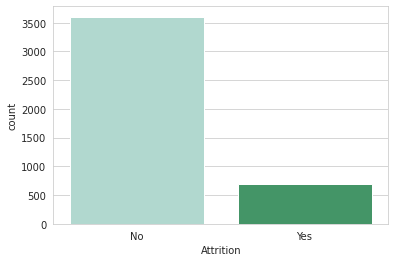

In [ ]:
#output data distribution
print("number of y == 1 : ", str(len(data[data["Attrition"] == "Yes"])))
print("number of y == 0 : ", str(len(data[data["Attrition"] == "No"])))
sns.set_style('whitegrid')
sns.countplot(x='Attrition',data=data,palette='BuGn')


###**Checking each categorical variable distribution and effect on output**

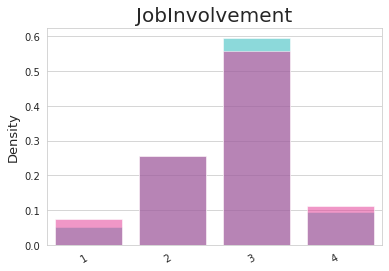

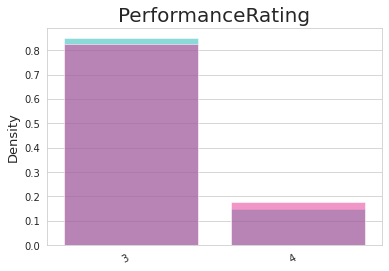

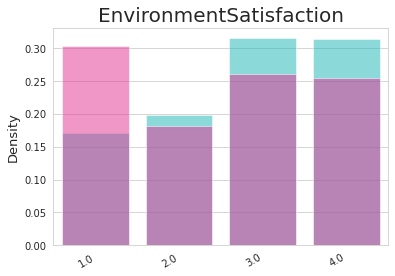

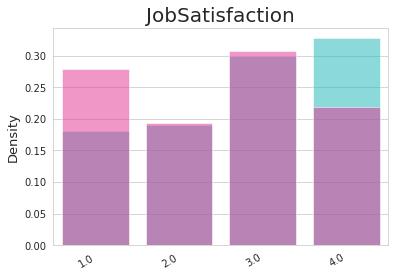

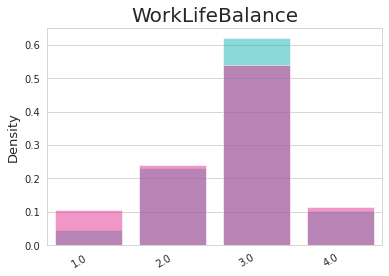

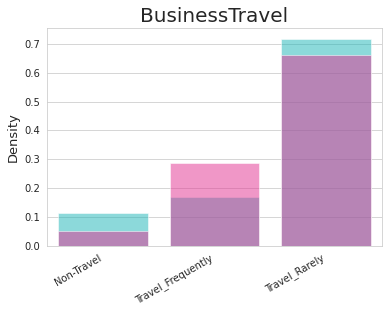

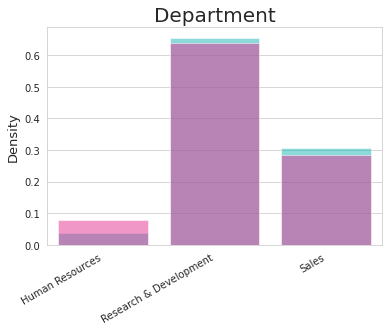

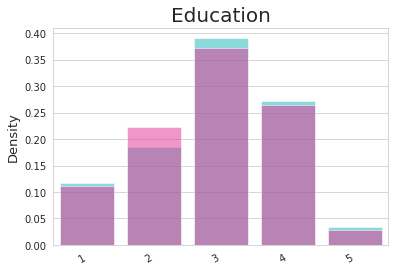

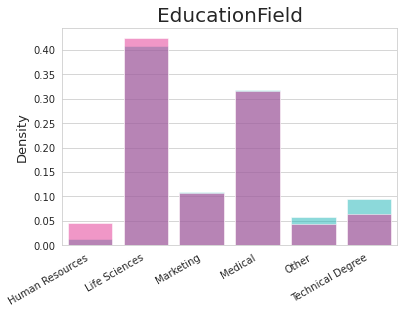

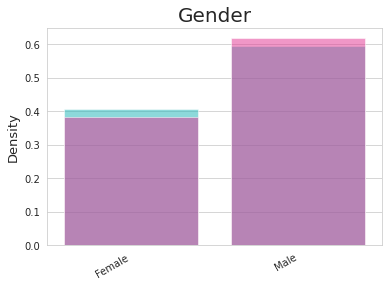

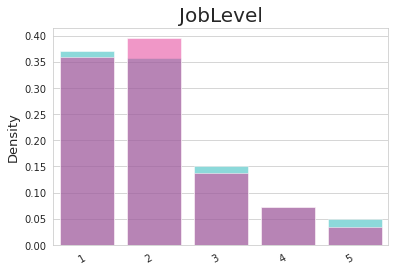

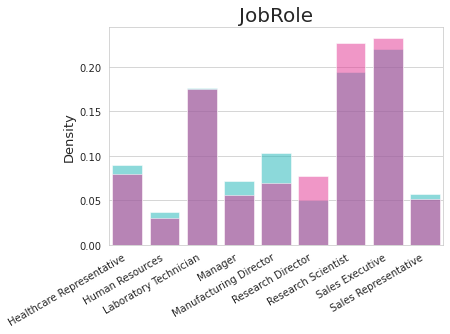

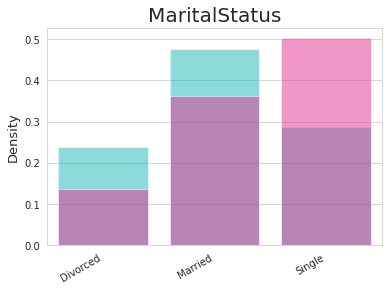

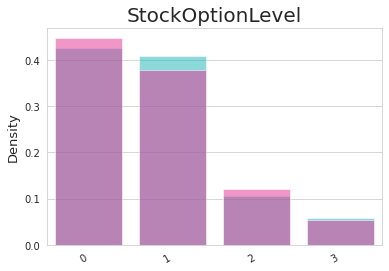

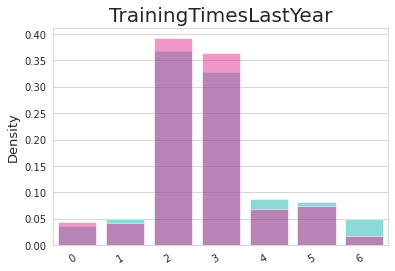

In [ ]:
class_0 = categorical_df.Attrition == "No"  
class_1 = categorical_df.Attrition == "Yes"

for i, col in enumerate(categorical_df.drop(["Attrition"], axis=1).columns):

          P1 = categorical_df[categorical_df["Attrition"] == "No"].groupby(col)[col].count().reset_index(name="count")
          P1['proportion'] = P1["count"]  / P1['count'].sum()
          P2 = categorical_df[categorical_df["Attrition"] == "Yes"].groupby(col)[col].count().reset_index(name="count")
          P2['proportion'] = P2["count"]  / P2['count'].sum()
          #display(P1)
          plt.figure(i)
          #sns.countplot(x=col, data=categorical_df)
           #  sns.catplot(y=col, hue="yes", kind="count",
          #  palette="pastel", edgecolor=".6",
           # data=categorical_df)
          ax = sns.barplot(x=P1[col],y=P1["proportion"], color='darkturquoise', alpha=0.5) 
          sns.barplot(x=P2[col],y=P2["proportion"], color='deeppink', alpha=0.5) 
          #sns.distplot(tr_categorical_df[col][class_1],color='darkturquoise')
          ax.set_ylabel('Density', fontsize=13)
          ax.set_title(str(col), fontsize=20)
          ax.set_xlabel('')
          ax.set_xticklabels(rotation=30, labels=P1[col], ha="right")

## **Convert categorical to one hot encoding**

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

#client categorical datas
tr_categorical_df = categorical_df.copy()

oh_JobInvolvement     = pd.DataFrame(OH_encoder.fit_transform(tr_categorical_df[["JobInvolvement"]]))
oh_JobInvolvement.columns = ["oh_JobInvolvement_" + str(x) for x in oh_JobInvolvement.columns]
print("oh_JobInvolvement", len(oh_JobInvolvement))



oh_PerformanceRating      = pd.DataFrame(OH_encoder.fit_transform(tr_categorical_df[["PerformanceRating"]]))
oh_PerformanceRating.columns = ["oh_PerformanceRating_" + str(x) for x in oh_PerformanceRating.columns]
print("oh_PerformanceRating", len(oh_PerformanceRating))

oh_EnvironmentSatisfaction      = pd.DataFrame(OH_encoder.fit_transform(tr_categorical_df[["EnvironmentSatisfaction"]]))
oh_EnvironmentSatisfaction.columns = ["oh_EnvironmentSatisfaction_" + str(x) for x in oh_EnvironmentSatisfaction.columns]
print("oh_EnvironmentSatisfaction", len(oh_EnvironmentSatisfaction))

oh_JobSatisfaction      = pd.DataFrame(OH_encoder.fit_transform(tr_categorical_df[["JobSatisfaction"]]))
oh_JobSatisfaction.columns = ["oh_JobSatisfaction_" + str(x) for x in oh_JobSatisfaction.columns]
print("oh_JobSatisfaction", len(oh_JobSatisfaction))



oh_WorkLifeBalance      = pd.DataFrame(OH_encoder.fit_transform(tr_categorical_df[["WorkLifeBalance"]]))
oh_WorkLifeBalance.columns = ["oh_WorkLifeBalance_" + str(x) for x in oh_WorkLifeBalance.columns]
print("oh_WorkLifeBalance", len(oh_WorkLifeBalance))

oh_BusinessTravel      = pd.DataFrame(OH_encoder.fit_transform(tr_categorical_df[["BusinessTravel"]]))
oh_BusinessTravel.columns = ["oh_BusinessTravel_" + str(x) for x in oh_BusinessTravel.columns]
print("oh_BusinessTravel", len(oh_BusinessTravel))

oh_Department      = pd.DataFrame(OH_encoder.fit_transform(tr_categorical_df[["Department"]]))
oh_Department.columns = ["oh_Department_" + str(x) for x in oh_Department.columns]
print("oh_Department", len(oh_Department))

oh_Education      = pd.DataFrame(OH_encoder.fit_transform(tr_categorical_df[["Education"]]))
oh_Education.columns = ["oh_Education_" + str(x) for x in oh_Education.columns]
print("oh_Education", len(oh_Education))

oh_EducationField      = pd.DataFrame(OH_encoder.fit_transform(tr_categorical_df[["EducationField"]]))
oh_EducationField.columns = ["oh_EducationField_" + str(x) for x in oh_EducationField.columns]
print("oh_EducationField", len(oh_EducationField))

oh_Gender      = pd.DataFrame(OH_encoder.fit_transform(tr_categorical_df[["Gender"]]))
oh_Gender.columns = ["oh_Gender_" + str(x) for x in oh_Gender.columns]
print("oh_Gender", len(oh_Gender))

oh_JobLevel      = pd.DataFrame(OH_encoder.fit_transform(tr_categorical_df[["JobLevel"]]))
oh_JobLevel.columns = ["oh_JobLevel_" + str(x) for x in oh_JobLevel.columns]
print("oh_JobLevel", len(oh_JobLevel))


oh_JobRole      = pd.DataFrame(OH_encoder.fit_transform(tr_categorical_df[["JobRole"]]))
oh_JobRole.columns = ["oh_JobRole_" + str(x) for x in oh_JobRole.columns]
print("oh_JobRole", len(oh_JobRole))


oh_MaritalStatus      = pd.DataFrame(OH_encoder.fit_transform(tr_categorical_df[["MaritalStatus"]]))
oh_MaritalStatus.columns = ["oh_MaritalStatus_" + str(x) for x in oh_MaritalStatus.columns]
print("oh_MaritalStatus", len(oh_MaritalStatus))

oh_StockOptionLevel      = pd.DataFrame(OH_encoder.fit_transform(tr_categorical_df[["StockOptionLevel"]]))
oh_StockOptionLevel.columns = ["oh_StockOptionLevel_" + str(x) for x in oh_StockOptionLevel.columns]
print("oh_StockOptionLevel", len(oh_StockOptionLevel))

oh_TrainingTimesLastYear     = pd.DataFrame(OH_encoder.fit_transform(tr_categorical_df[["TrainingTimesLastYear"]]))
oh_TrainingTimesLastYear.columns = ["oh_TrainingTimesLastYear_" + str(x) for x in oh_TrainingTimesLastYear.columns]
print("oh_TrainingTimesLastYear", len(oh_TrainingTimesLastYear))


oh_attri = tr_categorical_df["Attrition"].map({ "Yes": 1, "No": 0})

oh_categorical_df = pd.concat([oh_JobInvolvement, oh_PerformanceRating,oh_EnvironmentSatisfaction, oh_JobSatisfaction, oh_WorkLifeBalance, oh_BusinessTravel, oh_Department, oh_Education, oh_EducationField, oh_Gender, oh_JobLevel, oh_JobRole, oh_MaritalStatus,oh_StockOptionLevel,oh_TrainingTimesLastYear], axis=1)
oh_categorical_df["Attrition"] = tr_categorical_df["Attrition"]
oh_categorical_df = oh_categorical_df.replace({"Attrition":{"Yes": 1, "No": 0}})
print(len(oh_categorical_df))

oh_categorical_df


oh_JobInvolvement 4300
oh_PerformanceRating 4300
oh_EnvironmentSatisfaction 4300
oh_JobSatisfaction 4300
oh_WorkLifeBalance 4300
oh_BusinessTravel 4300
oh_Department 4300
oh_Education 4300
oh_EducationField 4300
oh_Gender 4300
oh_JobLevel 4300
oh_JobRole 4300
oh_MaritalStatus 4300
oh_StockOptionLevel 4300
oh_TrainingTimesLastYear 4300
4300


oh_JobInvolvement_0  ...  Attrition
0                     0.0  ...          0
1                     0.0  ...          1
2                     0.0  ...          0
3                     0.0  ...          0
4                     0.0  ...          0
...                   ...  ...        ...
4295                  0.0  ...          0
4296                  0.0  ...          0
4297                  0.0  ...          0
4298                  0.0  ...          0
4299                  0.0  ...          0

[4300 rows x 66 columns]

In [ ]:
len(oh_categorical_df.columns)

66

In [ ]:
quali_df

Age  DistanceFromHome  ...  YearsWithCurrManager  Attrition
0      51                 6  ...                     0         No
1      31                10  ...                     4        Yes
2      32                17  ...                     3         No
3      38                 2  ...                     5         No
4      32                10  ...                     4         No
...   ...               ...  ...                   ...        ...
4295   29                 4  ...                     5         No
4296   42                 5  ...                     2         No
4297   29                 2  ...                     2         No
4298   25                25  ...                     2         No
4299   42                18  ...                     8         No

[4300 rows x 10 columns]

##**Continuous Data**

###**Checking each variable distribution**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

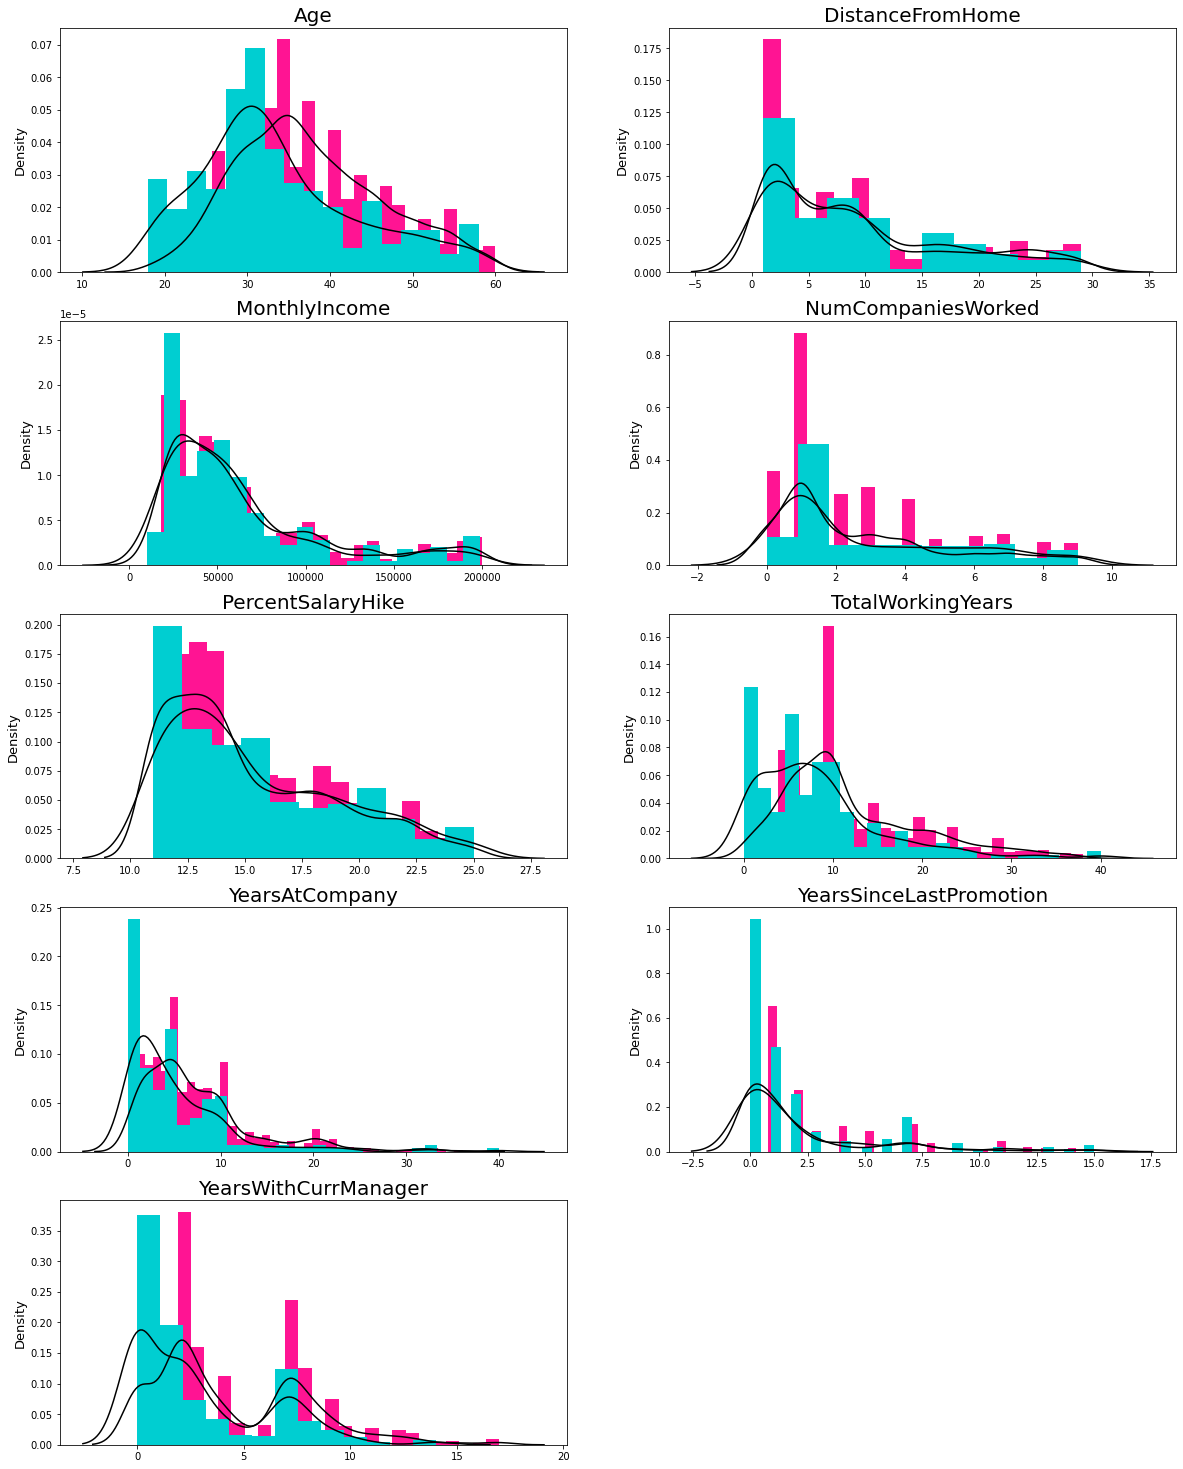

In [ ]:
columns = quali_df.columns
class_0 = quali_df.Attrition == "No"  
class_1 = quali_df.Attrition == "Yes"

grid = gridspec.GridSpec(15, 2)
plt.figure(figsize=(20,20*4))

for n, col in enumerate(quali_df.drop(["Attrition"], axis=1).columns):
    ax = plt.subplot(grid[n])
    sns.distplot(quali_df[col][class_0], color='deeppink', kde_kws={"color": "k", "lw": 1.5},  hist_kws=dict(alpha=1)) 
    sns.distplot(quali_df[col][class_1],color='darkturquoise', kde_kws={"color": "k", "lw": 1.5},  hist_kws=dict(alpha=1))
    ax.set_ylabel('Density', fontsize=13)
    ax.set_title(str(col), fontsize=20)
    ax.set_xlabel('')
plt.show()

### **bivariate analaysis**

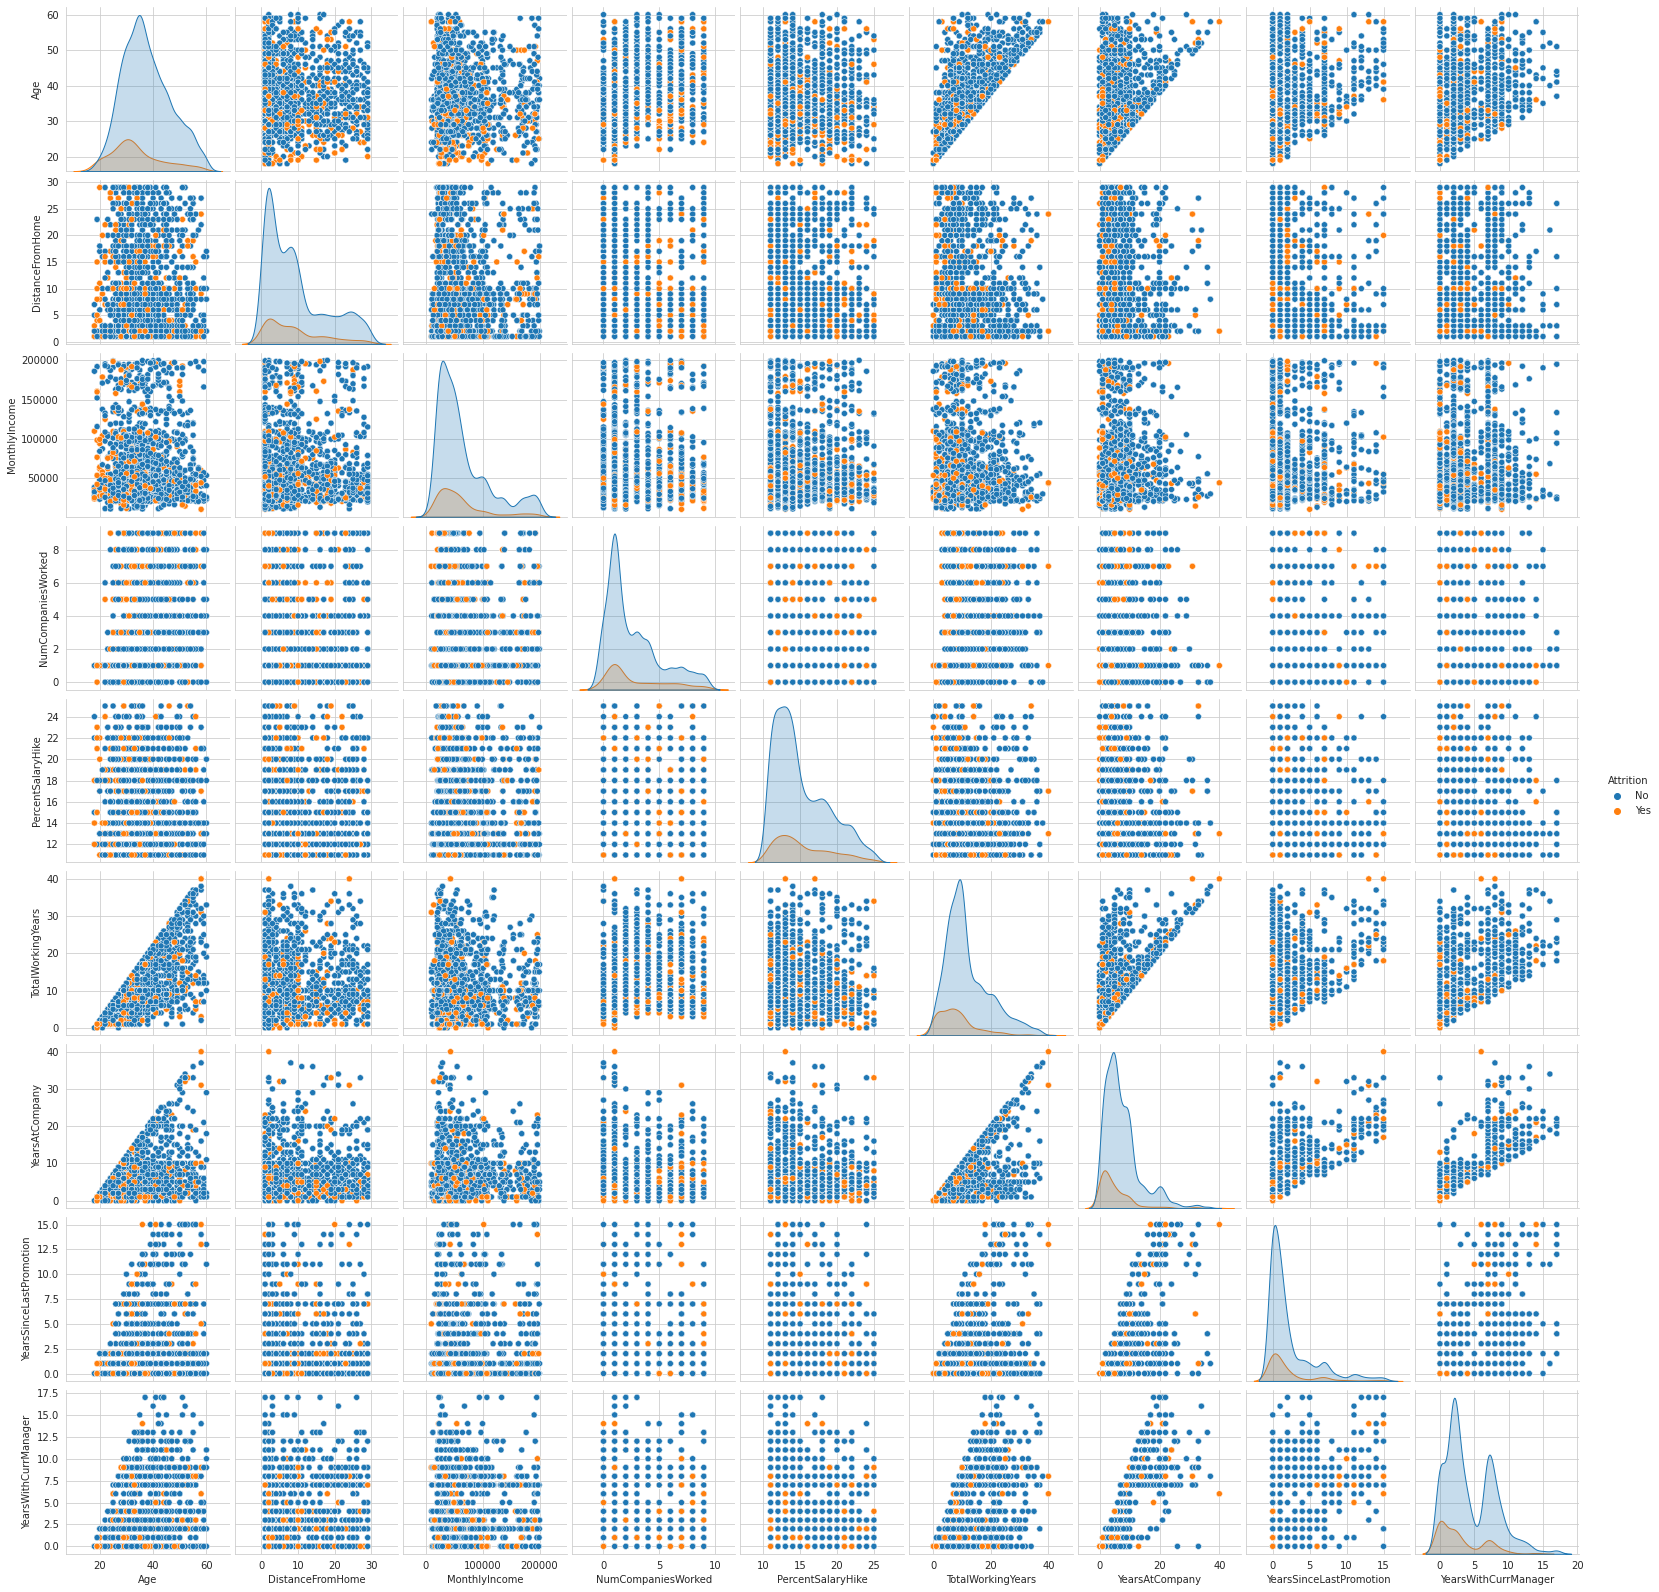

In [ ]:
sns.pairplot(data=quali_df,hue="Attrition")


### **features distribution and boxplot visualization**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

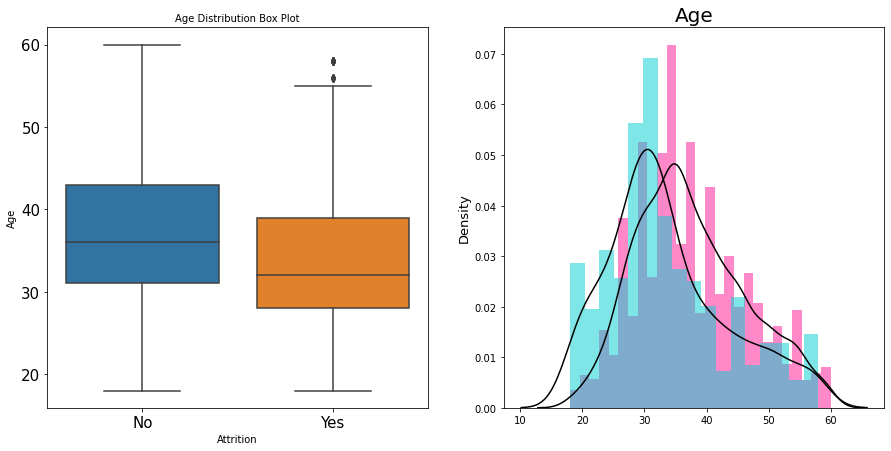

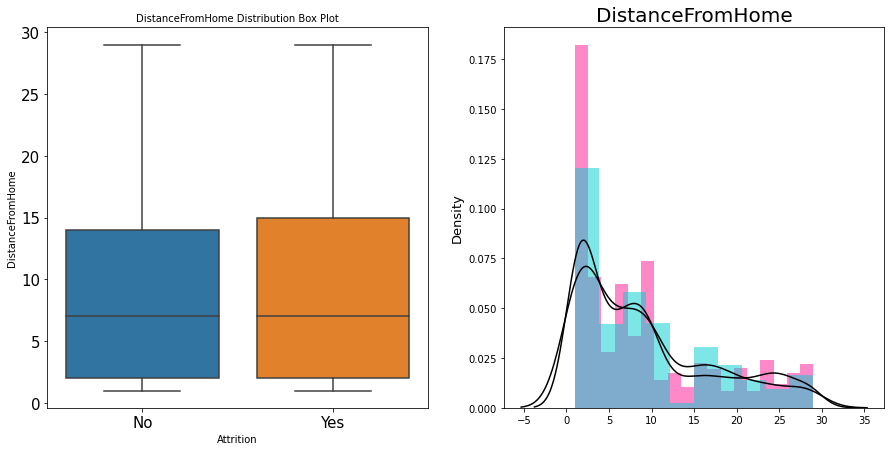

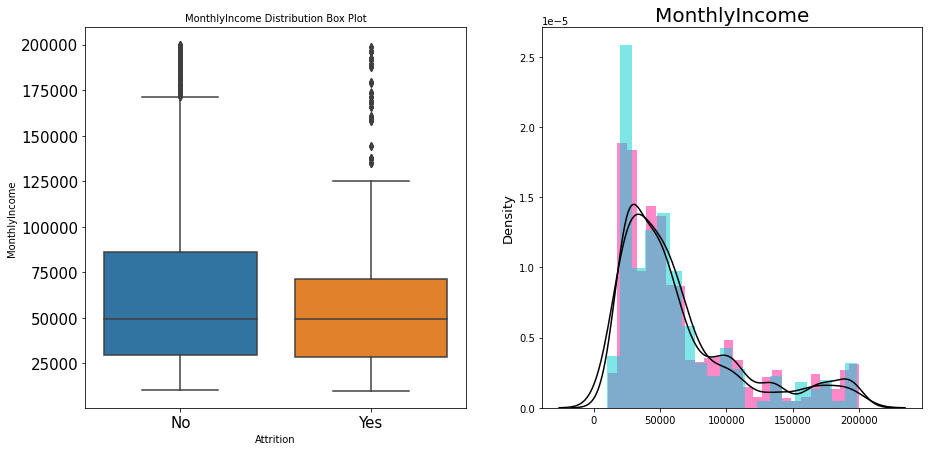

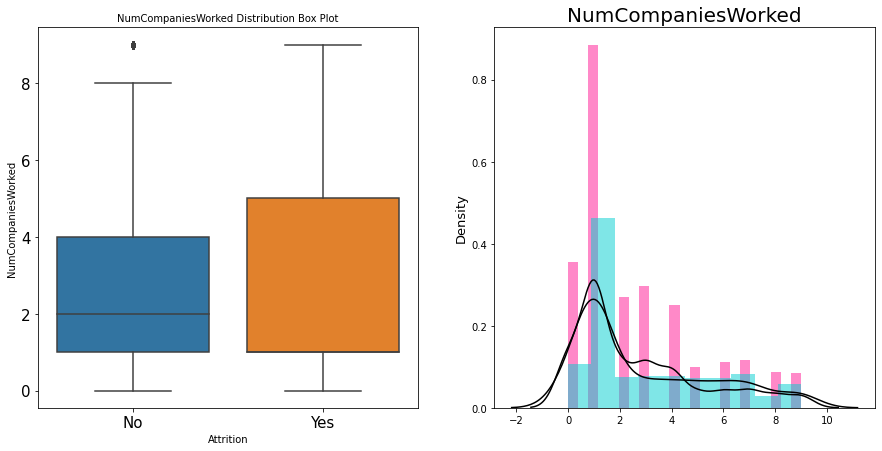

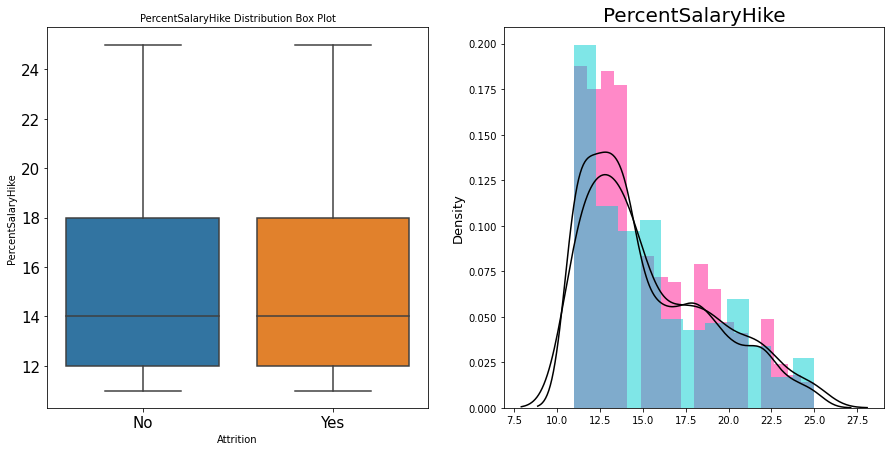

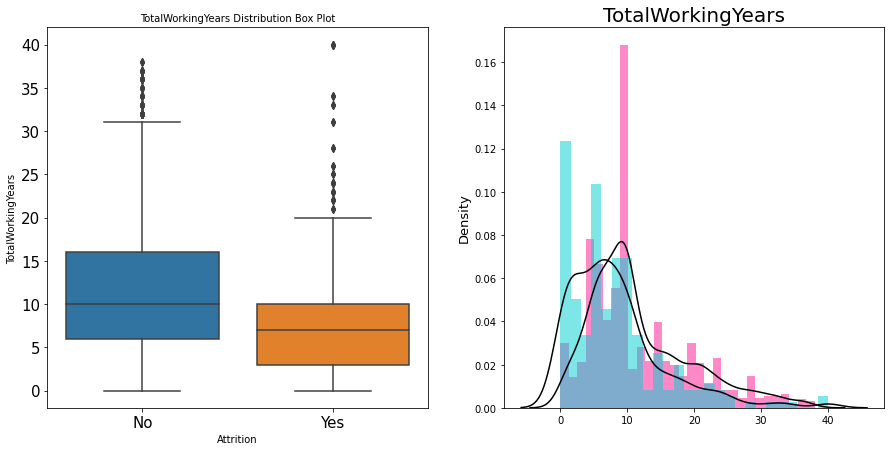

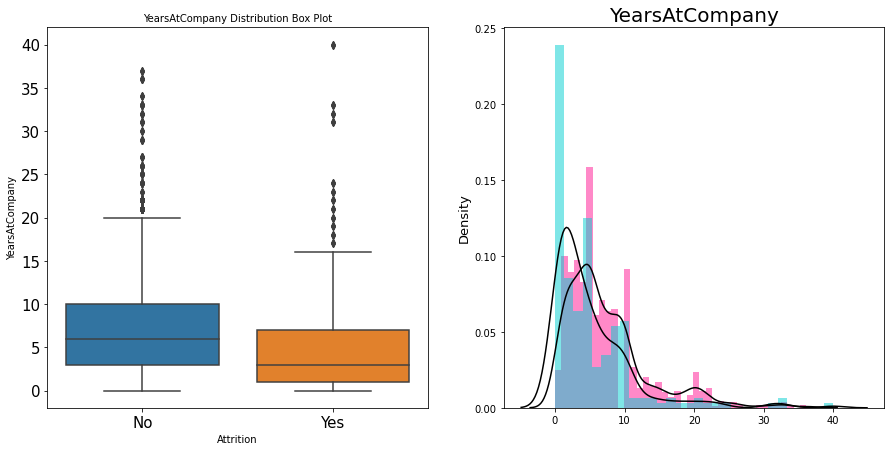

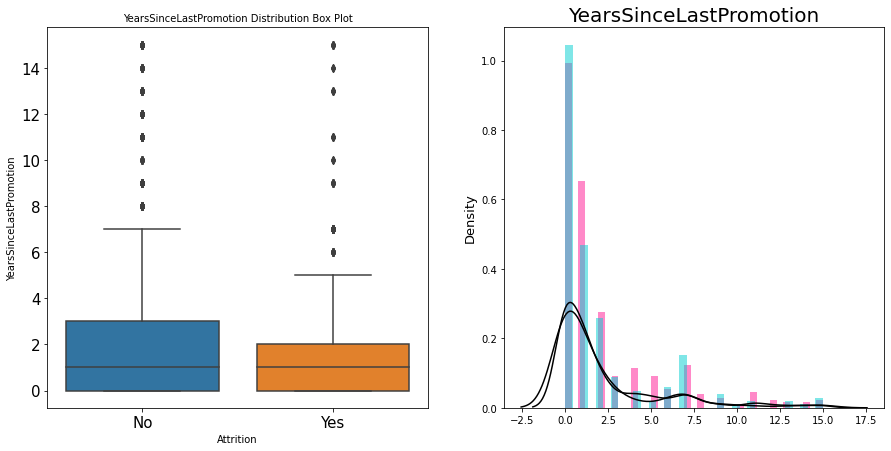

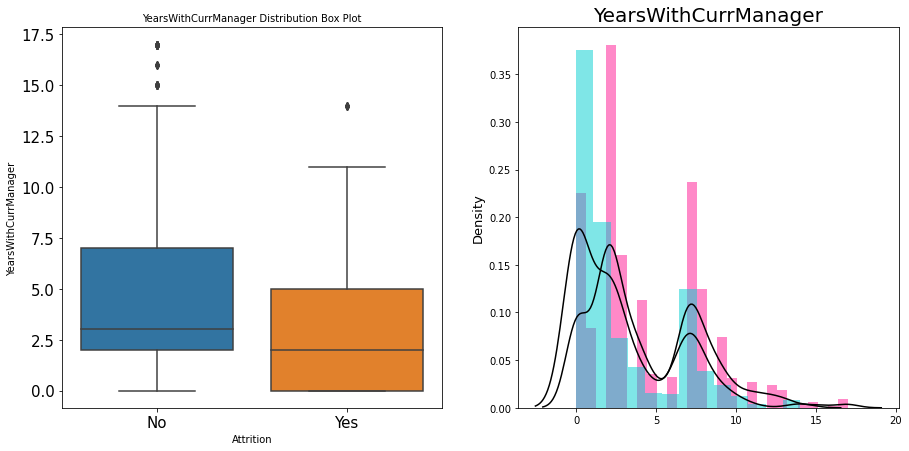

In [ ]:
 
class_0 = quali_df.Attrition == "No"  
class_1 = quali_df.Attrition == "Yes"

for i, col in enumerate(quali_df.drop(["Attrition"], axis=1).columns):

  fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 7))

  sns.boxplot(x = "Attrition",y=col, data = quali_df, orient = 'v', ax = ax1)
  ax1.set_ylabel(col, fontsize=10)
  ax1.set_title(col + ' Distribution Box Plot', fontsize=10)
  ax1.tick_params(labelsize=15)

  sns.distplot(quali_df[col][class_0], color='deeppink', kde_kws={"color": "k", "lw": 1.5},  hist_kws=dict(alpha=0.5)) 
  sns.distplot(quali_df[col][class_1],color='darkturquoise', kde_kws={"color": "k", "lw": 1.5},  hist_kws=dict(alpha=0.5))
  ax2.set_ylabel('Density', fontsize=13)
  ax2.set_title(str(col), fontsize=20)
  ax2.set_xlabel('')

combined_enc_df = pd.concat([quali_df.drop(["Attrition"], axis=1), oh_categorical_df],axis=1)

##**Removing outliers**

In [ ]:
cp_df = combined_enc_df.copy()

for i, col in enumerate(quali_df.drop(["Attrition"], axis=1).columns):

  Q3 = np.percentile(combined_enc_df[col], 75)
  Q1 = np.percentile(combined_enc_df[col], 25)

  # setting the cutoff
  
  cutoff = 5.0

  # computing the interquartile range
  IQR = (Q3 - Q1)

  # computing lower bound and upper bound
  lower_bound = Q1 - (IQR * cutoff)
  upper_bound = Q3 + (IQR * cutoff)
  print("BOUNDS ", Q3, Q1)
  # creating a filter to remove values less than lower bound and greater than
  # upper bound
  filter_data = ((combined_enc_df[col] < lower_bound) | (combined_enc_df[col] > upper_bound)) & (combined_enc_df["Attrition"] == 1)

  # filtering data
  outliers = combined_enc_df[filter_data][col]
  yes_outliers = combined_enc_df[(combined_enc_df['Attrition'] == 1) & (filter_data)][col]
  normal_outliers = combined_enc_df[(combined_enc_df['Attrition'] == 0) & filter_data][col]

  print(col)
  print(f"Total Number of Outliers : {outliers.count()}")
  print(f"Number of Outliers in yes Class : {yes_outliers.count()}")
  print(f"No of Outliers in Normal Class : {normal_outliers.count()}")
  print(f"Percentage of Attrition amount outliers : {round((yes_outliers.count()/outliers.count())*100,2)}%")
  combined_enc_df = combined_enc_df.drop(outliers.index)
  combined_enc_df.reset_index(inplace=True, drop=True)

BOUNDS  43.0 30.0
Age
Total Number of Outliers : 0
Number of Outliers in yes Class : 0
No of Outliers in Normal Class : 0
Percentage of Attrition amount outliers : nan%
BOUNDS  14.0 2.0
DistanceFromHome
Total Number of Outliers : 0
Number of Outliers in yes Class : 0
No of Outliers in Normal Class : 0
Percentage of Attrition amount outliers : nan%
BOUNDS  83802.5 29260.0
MonthlyIncome
Total Number of Outliers : 0
Number of Outliers in yes Class : 0
No of Outliers in Normal Class : 0
Percentage of Attrition amount outliers : nan%
BOUNDS  4.0 1.0
NumCompaniesWorked
Total Number of Outliers : 0
Number of Outliers in yes Class : 0
No of Outliers in Normal Class : 0
Percentage of Attrition amount outliers : nan%
BOUNDS  18.0 12.0
PercentSalaryHike
Total Number of Outliers : 0
Number of Outliers in yes Class : 0
No of Outliers in Normal Class : 0
Percentage of Attrition amount outliers : nan%
BOUNDS  15.0 6.0
TotalWorkingYears
Total Number of Outliers : 0
Number of Outliers in yes Class : 0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/p

In [ ]:
cp_df = combined_enc_df.copy()

for i, col in enumerate(quali_df.drop(["Attrition"], axis=1).columns):

  Q3 = np.percentile(combined_enc_df[col], 75)
  Q1 = np.percentile(combined_enc_df[col], 25)

  # setting the cutoff
  
  cutoff = 1.5

  # computing the interquartile range
  IQR = (Q3 - Q1)

  # computing lower bound and upper bound
  lower_bound = Q1 - (IQR * cutoff)
  upper_bound = Q3 + (IQR * cutoff)

  # creating a filter to remove values less than lower bound and greater than
  # upper bound
  filter_data = ((combined_enc_df[col] < lower_bound) | (combined_enc_df[col] > upper_bound)) & (combined_enc_df["Attrition"] == 0)

  # filtering data
  outliers = combined_enc_df[filter_data][col]
  yes_outliers = combined_enc_df[(combined_enc_df['Attrition'] == 1) & (filter_data)][col]
  normal_outliers = combined_enc_df[(combined_enc_df['Attrition'] == 0) & filter_data][col]

  print(col)
  print(f"Total Number of Outliers : {outliers.count()}")
  print(f"Number of Outliers in yes Class : {yes_outliers.count()}")
  print(f"No of Outliers in Normal Class : {normal_outliers.count()}")
  print(f"Percentage of Attrition amount outliers : {round((yes_outliers.count()/outliers.count())*100,2)}%")
  combined_enc_df = combined_enc_df.drop(outliers.index)
  combined_enc_df.reset_index(inplace=True, drop=True)

Age
Total Number of Outliers : 0
Number of Outliers in yes Class : 0
No of Outliers in Normal Class : 0
Percentage of Attrition amount outliers : nan%
DistanceFromHome
Total Number of Outliers : 0
Number of Outliers in yes Class : 0
No of Outliers in Normal Class : 0
Percentage of Attrition amount outliers : nan%
MonthlyIncome
Total Number of Outliers : 285
Number of Outliers in yes Class : 0
No of Outliers in Normal Class : 285
Percentage of Attrition amount outliers : 0.0%
NumCompaniesWorked
Total Number of Outliers : 103
Number of Outliers in yes Class : 0
No of Outliers in Normal Class : 103
Percentage of Attrition amount outliers : 0.0%
PercentSalaryHike
Total Number of Outliers : 0
Number of Outliers in yes Class : 0
No of Outliers in Normal Class : 0
Percentage of Attrition amount outliers : nan%
TotalWorkingYears
Total Number of Outliers : 156
Number of Outliers in yes Class : 0
No of Outliers in Normal Class : 156
Percentage of Attrition amount outliers : 0.0%
YearsAtCompany
T

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in long_scalars


###**Monthly income**

In [ ]:
quali_df.columns

Index(['Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition'],
      dtype='object')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, '')

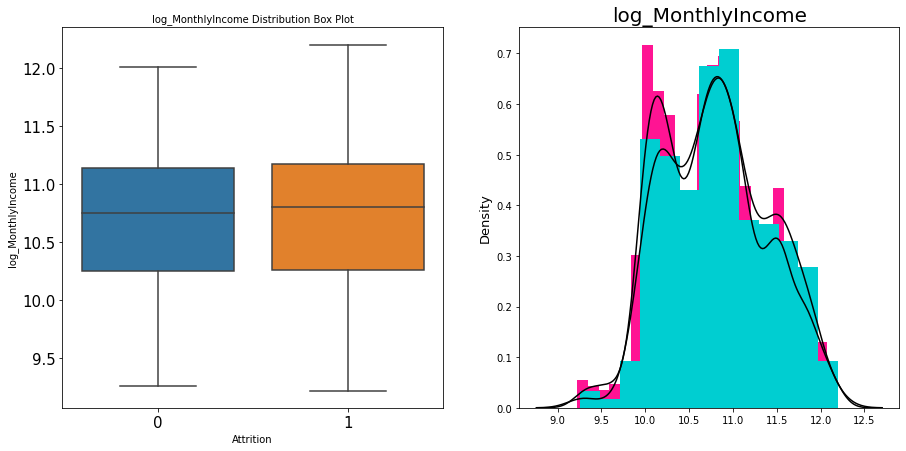

In [ ]:
combined_enc_df = combined_enc_df[combined_enc_df["MonthlyIncome"] != 0]
combined_enc_df["log_MonthlyIncome"] =np.log(combined_enc_df[["MonthlyIncome"]] + 0.01)
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 7))

sns.boxplot(x="Attrition", y = "log_MonthlyIncome", data = combined_enc_df, orient = 'v', ax = ax1)
ax1.set_ylabel("log_MonthlyIncome", fontsize=10)
ax1.set_title("log_MonthlyIncome" + ' Distribution Box Plot', fontsize=10)
ax1.tick_params(labelsize=15)



sns.distplot(combined_enc_df["log_MonthlyIncome"][class_0], color='deeppink', kde_kws={"color": "k", "lw": 1.5},  hist_kws=dict(alpha=1)) 
sns.distplot(combined_enc_df["log_MonthlyIncome"][class_1],color='darkturquoise', kde_kws={"color": "k", "lw": 1.5},  hist_kws=dict(alpha=1))
ax2.set_ylabel('Density', fontsize=13)
ax2.set_title(str("log_MonthlyIncome"), fontsize=20)
ax2.set_xlabel('')



##**std scaling:**

In [ ]:
scaler = StandardScaler()
enc_scale_list = quali_df.drop(["Attrition","MonthlyIncome"], axis=1).columns.to_list() + ["log_MonthlyIncome"]
combined_enc_df[enc_scale_list] = scaler.fit_transform(combined_enc_df[enc_scale_list])


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

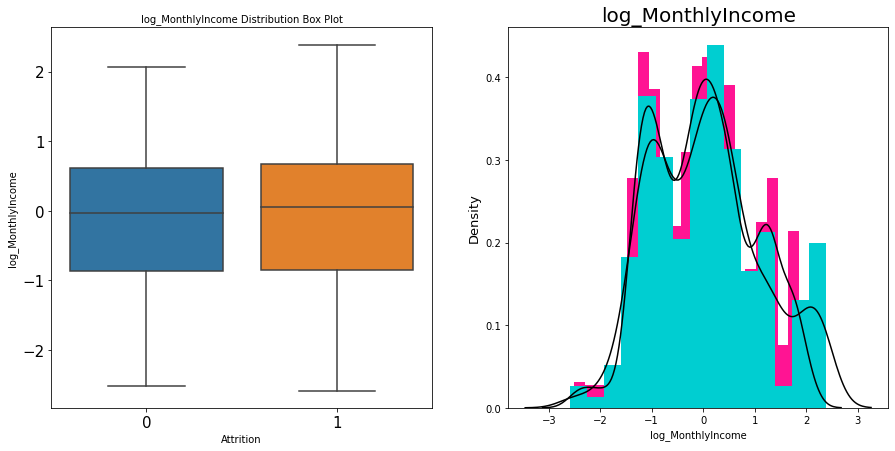

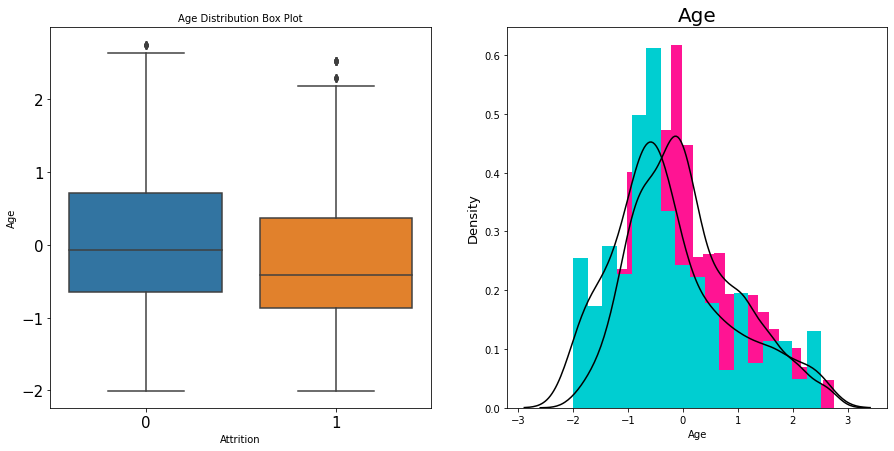

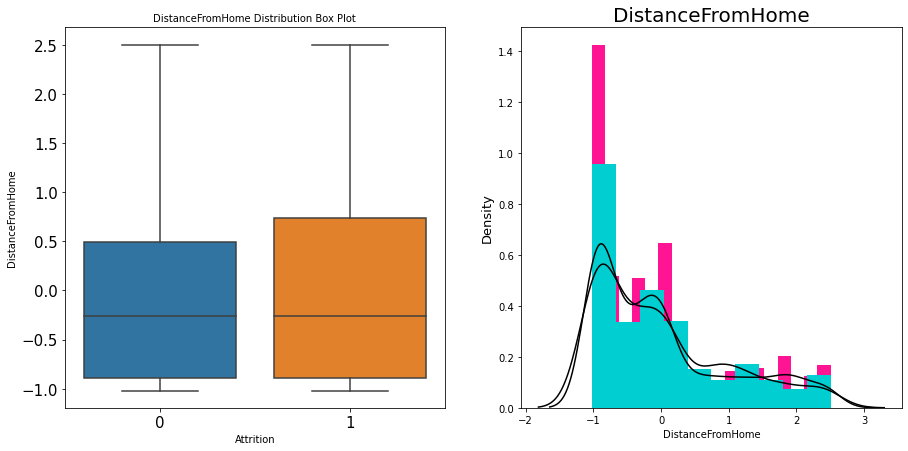

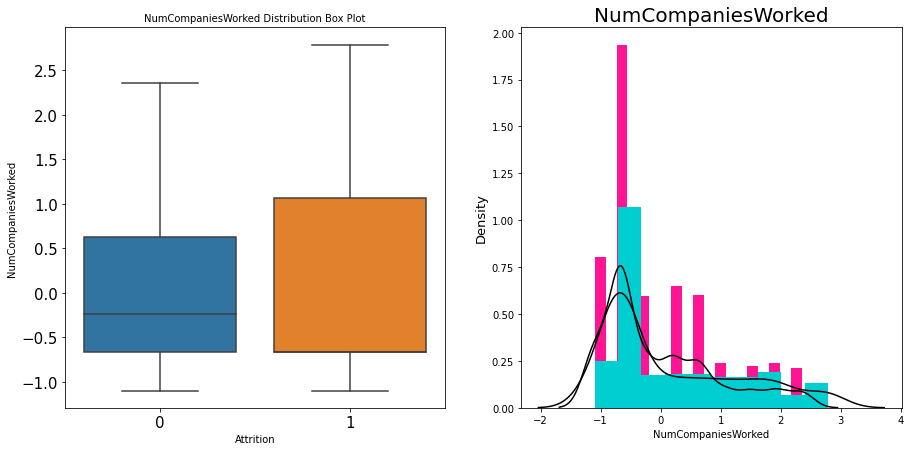

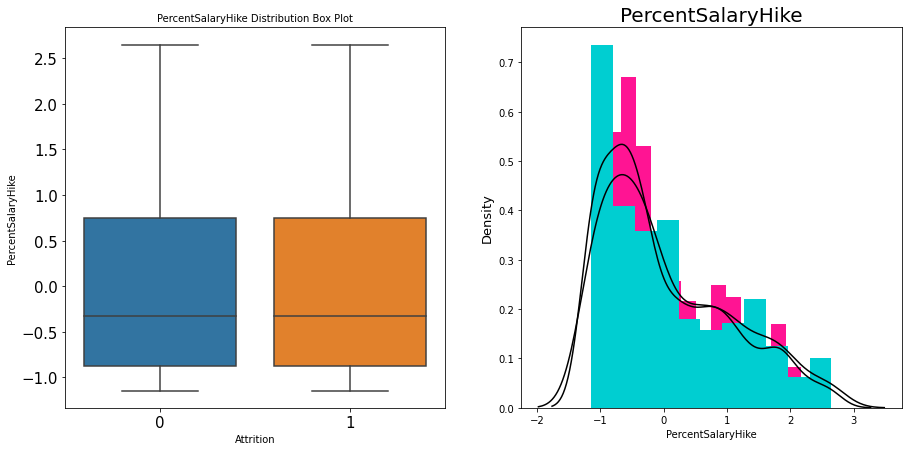

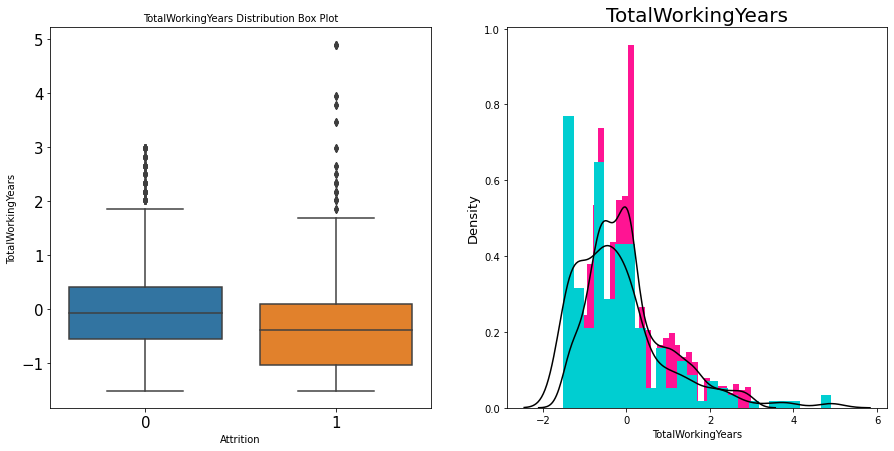

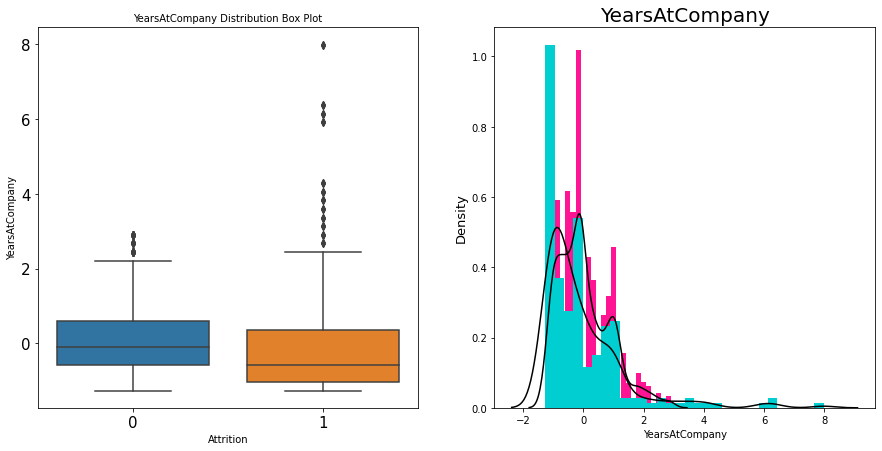

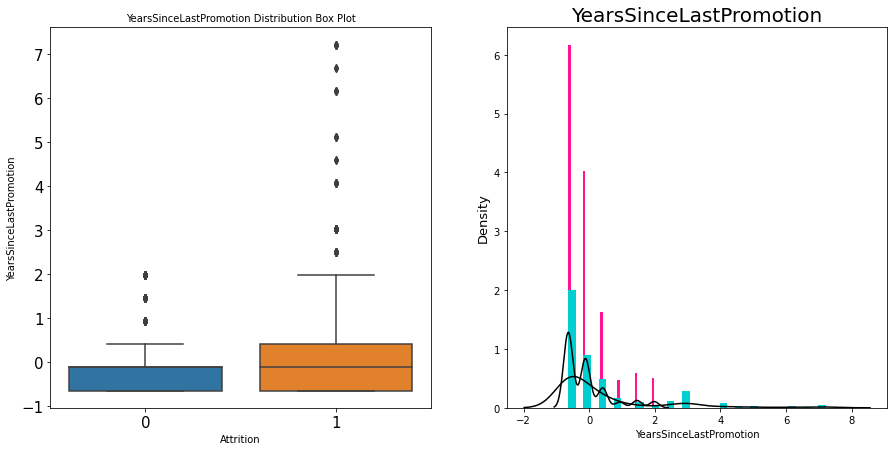

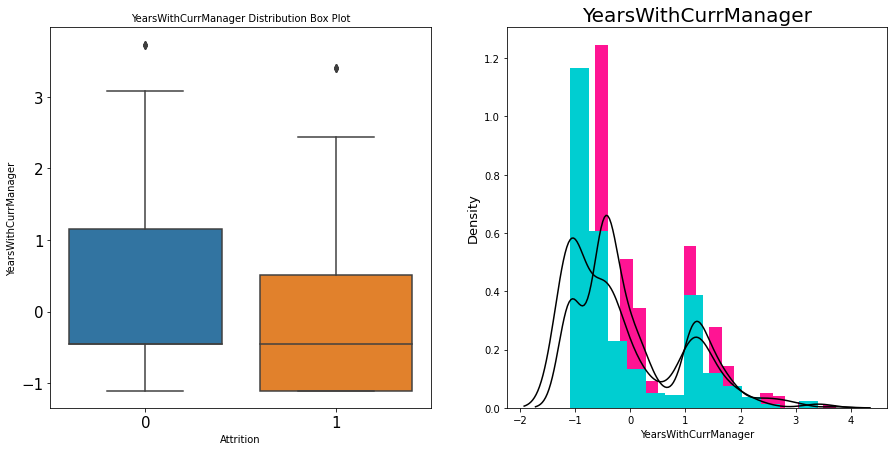

In [ ]:
class_0 = combined_enc_df["Attrition"] == 0  
class_1 = combined_enc_df["Attrition"] == 1

for i, col in enumerate(["log_MonthlyIncome"] + quali_df.drop(["MonthlyIncome", "Attrition"], axis=1).columns.to_list()):

  fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 7))

  sns.boxplot(x = "Attrition",y=col, data = combined_enc_df, orient = 'v', ax = ax1)
  ax1.set_ylabel(col, fontsize=10)
  ax1.set_title(col + ' Distribution Box Plot', fontsize=10)
  ax1.tick_params(labelsize=15)

  sns.distplot(combined_enc_df[col][class_0], color='deeppink', kde_kws={"color": "k", "lw": 1.5},  hist_kws=dict(alpha=1)) 
  sns.distplot(combined_enc_df[col][class_1],color='darkturquoise', kde_kws={"color": "k", "lw": 1.5},  hist_kws=dict(alpha=1))
  ax2.set_ylabel('Density', fontsize=13)
  ax2.set_title(str(col), fontsize=20)

##**Feature selection**

In [ ]:
final_y = combined_enc_df["Attrition"]
combined_enc_df.drop(["MonthlyIncome"], axis=1, inplace=True)

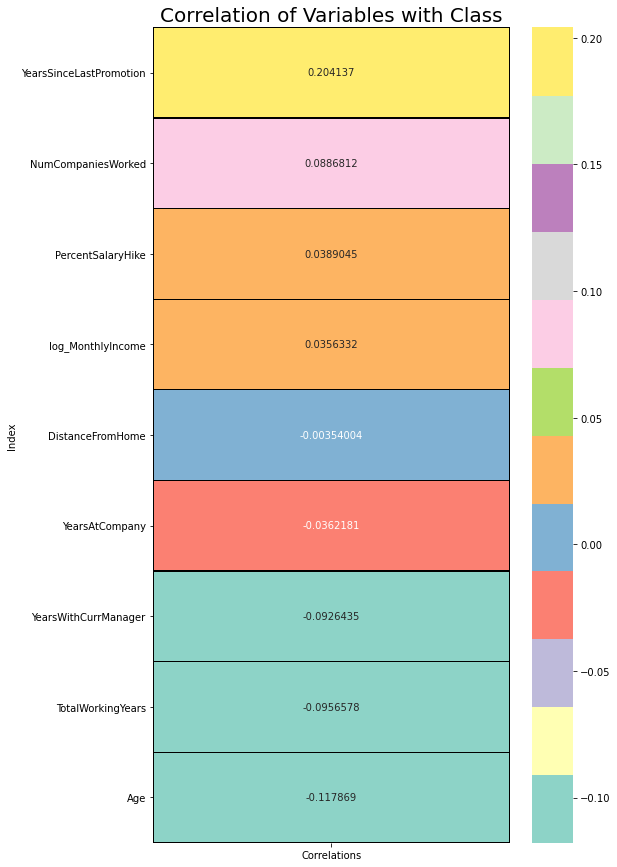

In [ ]:
corr = combined_enc_df[enc_scale_list].corrwith(combined_enc_df['Attrition']).reset_index()

corr.columns = ['Index','Correlations']
corr = corr.set_index('Index')
corr = corr.sort_values(by=['Correlations'], ascending = False)

plt.figure(figsize=(8, 15))
fig = sns.heatmap(corr, annot=True, fmt="g", cmap='Set3', linewidths=0.4, linecolor='black')

plt.title("Correlation of Variables with Class", fontsize=20)
plt.show()

In [ ]:
column_to_drop= corr[~(corr["Correlations"].abs()>= 0.10)].index.tolist()
column_to_drop

['NumCompaniesWorked',
 'PercentSalaryHike',
 'log_MonthlyIncome',
 'DistanceFromHome',
 'YearsAtCompany',
 'YearsWithCurrManager',
 'TotalWorkingYears']

In [ ]:
combined_enc_df[combined_enc_df["Attrition"].isnull()]

Empty DataFrame
Columns: [Age, DistanceFromHome, NumCompaniesWorked, PercentSalaryHike, TotalWorkingYears, YearsAtCompany, YearsSinceLastPromotion, YearsWithCurrManager, oh_JobInvolvement_0, oh_JobInvolvement_1, oh_JobInvolvement_2, oh_JobInvolvement_3, oh_PerformanceRating_0, oh_PerformanceRating_1, oh_EnvironmentSatisfaction_0, oh_EnvironmentSatisfaction_1, oh_EnvironmentSatisfaction_2, oh_EnvironmentSatisfaction_3, oh_JobSatisfaction_0, oh_JobSatisfaction_1, oh_JobSatisfaction_2, oh_JobSatisfaction_3, oh_WorkLifeBalance_0, oh_WorkLifeBalance_1, oh_WorkLifeBalance_2, oh_WorkLifeBalance_3, oh_BusinessTravel_0, oh_BusinessTravel_1, oh_BusinessTravel_2, oh_Department_0, oh_Department_1, oh_Department_2, oh_Education_0, oh_Education_1, oh_Education_2, oh_Education_3, oh_Education_4, oh_EducationField_0, oh_EducationField_1, oh_EducationField_2, oh_EducationField_3, oh_EducationField_4, oh_EducationField_5, oh_Gender_0, oh_Gender_1, oh_JobLevel_0, oh_JobLevel_1, oh_JobLevel_2, oh_JobLevel_3, oh_JobLevel_4, oh_JobRole_0, oh_JobRole_1, oh_JobRole_2, oh_JobRole_3, oh_JobRole_4, oh_JobRole_5, oh_JobRole_6, oh_JobRole_7, oh_JobRole_8, oh_MaritalStatus_0, oh_MaritalStatus_1, oh_MaritalStatus_2, oh_StockOptionLevel_0, oh_StockOptionLevel_1, oh_StockOptionLevel_2, oh_StockOptionLevel_3, oh_TrainingTimesLastYear_0, oh_TrainingTimesLastYear_1, oh_TrainingTimesLastYear_2, oh_TrainingTimesLastYear_3, oh_TrainingTimesLastYear_4, oh_TrainingTimesLastYear_5, oh_TrainingTimesLastYear_6, Attrition, log_MonthlyIncome]
Index: []

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
cat_columns = oh_categorical_df.drop(["Attrition"], axis=1).columns.to_list()

selector = SelectKBest(chi2, k=len(cat_columns))
selector.fit(combined_enc_df[cat_columns], final_y)

cat_features = pd.DataFrame({'Features':combined_enc_df[cat_columns].columns, 'P-Value':selector.pvalues_}).sort_values(by='P-Value')
display(cat_features)

cat_to_drop = cat_features[cat_features["P-Value"] > 0.1]["Features"].to_list()
cat_to_drop


Features       P-Value
53            oh_MaritalStatus_2  2.559952e-15
6   oh_EnvironmentSatisfaction_0  1.007716e-11
19           oh_BusinessTravel_1  5.237296e-10
14          oh_WorkLifeBalance_0  3.846287e-09
10          oh_JobSatisfaction_0  2.122334e-08
..                           ...           ...
40                 oh_JobLevel_3  7.860881e-01
22               oh_Department_1  8.971270e-01
11          oh_JobSatisfaction_1  9.311110e-01
28                oh_Education_4  9.527149e-01
37                 oh_JobLevel_0  9.569153e-01

[65 rows x 2 columns]

['oh_PerformanceRating_1',
 'oh_TrainingTimesLastYear_1',
 'oh_JobRole_6',
 'oh_JobInvolvement_3',
 'oh_JobLevel_1',
 'oh_TrainingTimesLastYear_3',
 'oh_StockOptionLevel_2',
 'oh_JobRole_1',
 'oh_TrainingTimesLastYear_2',
 'oh_JobRole_3',
 'oh_TrainingTimesLastYear_0',
 'oh_JobLevel_2',
 'oh_WorkLifeBalance_3',
 'oh_Gender_0',
 'oh_EnvironmentSatisfaction_1',
 'oh_StockOptionLevel_3',
 'oh_JobInvolvement_1',
 'oh_Education_2',
 'oh_EducationField_1',
 'oh_StockOptionLevel_1',
 'oh_Education_3',
 'oh_WorkLifeBalance_1',
 'oh_Gender_1',
 'oh_JobRole_7',
 'oh_PerformanceRating_0',
 'oh_JobRole_2',
 'oh_EducationField_2',
 'oh_JobInvolvement_2',
 'oh_JobRole_8',
 'oh_TrainingTimesLastYear_5',
 'oh_StockOptionLevel_0',
 'oh_JobSatisfaction_2',
 'oh_EducationField_3',
 'oh_Education_0',
 'oh_JobLevel_3',
 'oh_Department_1',
 'oh_JobSatisfaction_1',
 'oh_Education_4',
 'oh_JobLevel_0']

In [ ]:
print(len(cat_to_drop))
print(cat_to_drop[0:10])
print(cat_to_drop[10:20])
print(cat_to_drop[20:30])
print(cat_to_drop[30:40])

39
['oh_PerformanceRating_1', 'oh_TrainingTimesLastYear_1', 'oh_JobRole_6', 'oh_JobInvolvement_3', 'oh_JobLevel_1', 'oh_TrainingTimesLastYear_3', 'oh_StockOptionLevel_2', 'oh_JobRole_1', 'oh_TrainingTimesLastYear_2', 'oh_JobRole_3']
['oh_TrainingTimesLastYear_0', 'oh_JobLevel_2', 'oh_WorkLifeBalance_3', 'oh_Gender_0', 'oh_EnvironmentSatisfaction_1', 'oh_StockOptionLevel_3', 'oh_JobInvolvement_1', 'oh_Education_2', 'oh_EducationField_1', 'oh_StockOptionLevel_1']
['oh_Education_3', 'oh_WorkLifeBalance_1', 'oh_Gender_1', 'oh_JobRole_7', 'oh_PerformanceRating_0', 'oh_JobRole_2', 'oh_EducationField_2', 'oh_JobInvolvement_2', 'oh_JobRole_8', 'oh_TrainingTimesLastYear_5']
['oh_StockOptionLevel_0', 'oh_JobSatisfaction_2', 'oh_EducationField_3', 'oh_Education_0', 'oh_JobLevel_3', 'oh_Department_1', 'oh_JobSatisfaction_1', 'oh_Education_4', 'oh_JobLevel_0']


In [ ]:
oh_categorical_df

oh_JobInvolvement_0  ...  Attrition
0                     0.0  ...          0
1                     0.0  ...          1
2                     0.0  ...          0
3                     0.0  ...          0
4                     0.0  ...          0
...                   ...  ...        ...
4295                  0.0  ...          0
4296                  0.0  ...          0
4297                  0.0  ...          0
4298                  0.0  ...          0
4299                  0.0  ...          0

[4300 rows x 66 columns]

In [ ]:
#combined_enc_df.drop(column_to_drop,axis=1,inplace=True)
combined_enc_df.drop(cat_to_drop,axis=1, inplace=True)

In [ ]:
combined_enc_df.drop(["Attrition"], axis=1, inplace=True)


## **splitting Data**

In [ ]:
#one hot encoded
X_train_enc,X_test_enc,y_train_enc,y_test_enc = train_test_split(combined_enc_df,final_y, test_size=0.2,random_state=101)
X_train_enc,X_val_enc,y_train_enc,y_val_enc = train_test_split(X_train_enc,y_train_enc, test_size=0.2,random_state=101)


##**Resampling**


In [ ]:
#Random undersampling
X_rus_enc, y_rus_enc, _=  underSampling(X_train_enc,y_train_enc)


#Random oversampling
X_ros_enc, y_ros_enc, _= overSampling(X_train_enc,y_train_enc)


#tomeklinks
X_tom_enc, y_tom_enc, _=  tomekLinks(X_train_enc,y_train_enc)


#SMOTE
X_smt_enc, y_smt_enc =   smote(X_train_enc,y_train_enc)

#Adasyn
X_ads_enc, y_ads_enc =   adasyn(X_train_enc,y_train_enc)

#SMOTE + tomeklinks
X_smtom_enc, y_smtom_enc=   smote_plus_tomek(X_train_enc,y_train_enc)

#ROS + tomeklinks
X_rostom_enc, y_rostom_enc,_=   overAndTomeLinks(X_train_enc,y_train_enc)



/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

1216 new random picked points


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Removed indexes: [   0    1    2 ... 2643 2644 2645]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


#**Models**

In [ ]:


METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

def make_model(input_shape, metrics=METRICS, output_bias=None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
    
  model = keras.Sequential([
      keras.layers.Dense(
          16, activation='relu',
          input_shape=(input_shape,)),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(1, activation='sigmoid',
                         bias_initializer=output_bias),
  ])

  model.compile(
      optimizer=keras.optimizers.Adam(lr=1e-3),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

  return model

#CNN model
def make_cnn_model(input_shape,
                    metrics=METRICS,  output_bias=None):

    model = keras.Sequential([
      keras.layers.Convolution1D(
          filters=32, kernel_size=3, activation='relu',
          input_shape=(input_shape, 1)),
      keras.layers.Convolution1D(
          filters=32, kernel_size=3, activation='relu'),
      keras.layers.Dropout(0.5),
      keras.layers.MaxPooling1D(pool_size=2),
      keras.layers.Flatten(),
      keras.layers.Dense(64, activation="relu"),
      keras.layers.Dense(1, activation='sigmoid',
                         bias_initializer=output_bias),
  ])
    model.compile(loss=keras.losses.BinaryCrossentropy(), optimizer=keras.optimizers.Adam(lr=1e-3), metrics=metrics)
    return model
EPOCHS = 1000
BATCH_SIZE = 2048
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_auc', 
    verbose=1,
    patience=30,
    mode='max',
    restore_best_weights=True)

##**withoout resampling**

###**Base**

In [ ]:
random.seed(seed_value)

np.random.seed(seed_value)

tf.random.set_seed(seed_value)
model = make_model(X_train_enc.shape[-1])
history = model.fit(
    X_train_enc,
    y_train_enc,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(X_val_enc, y_val_enc))

Epoch 1/1000
2/2 [==============================] - 4s 1s/step - loss: 1.3378 - tp: 431.3333 - fp: 1635.0000 - tn: 9.0000 - fn: 2.0000 - accuracy: 0.2120 - precision: 0.2087 - recall: 0.9954 - auc: 0.4341 - val_loss: 1.2649 - val_tp: 121.0000 - val_fp: 403.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.2309 - val_precision: 0.2309 - val_recall: 1.0000 - val_auc: 0.4699
Epoch 2/1000
2/2 [==============================] - 0s 50ms/step - loss: 1.3152 - tp: 434.0000 - fp: 1636.3333 - tn: 5.0000 - fn: 2.0000 - accuracy: 0.2113 - precision: 0.2096 - recall: 0.9954 - auc: 0.4553 - val_loss: 1.2499 - val_tp: 121.0000 - val_fp: 403.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.2309 - val_precision: 0.2309 - val_recall: 1.0000 - val_auc: 0.4738
Epoch 3/1000
2/2 [==============================] - 0s 43ms/step - loss: 1.3172 - tp: 430.0000 - fp: 1631.3333 - tn: 12.0000 - fn: 4.0000 - accuracy: 0.2128 - precision: 0.2086 - recall: 0.9908 - auc: 0.4376 - val_loss

In [ ]:
#test results
results = model.evaluate(X_test_enc, y_test_enc, batch_size=BATCH_SIZE, verbose=0)

print("test results :")
for name, value in zip(model.metrics_names, results):
  print(name, ': ', value)
print()

test results :
loss :  0.4037873148918152
tp :  40.0
fp :  8.0
tn :  510.0
fn :  96.0
accuracy :  0.8409786224365234
precision :  0.8333333134651184
recall :  0.29411765933036804
auc :  0.7997175455093384



test results :
loss :  0.3958752453327179
tp :  41.0
fp :  11.0
tn :  507.0
fn :  95.0
accuracy :  0.8379204869270325
precision :  0.7884615659713745
recall :  0.3014705777168274
auc :  0.8047424554824829

              precision    recall  f1-score   support

           0       0.84      0.98      0.91       518
           1       0.83      0.29      0.43       136

    accuracy                           0.84       654
   macro avg       0.84      0.64      0.67       654
weighted avg       0.84      0.84      0.81       654



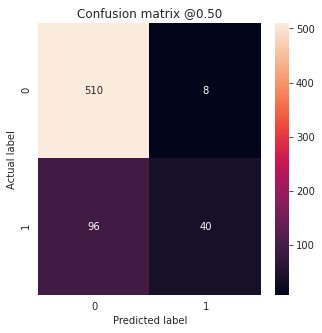

In [ ]:
base_test_pred = model.predict(X_test_enc, batch_size=BATCH_SIZE)
plot_cm(y_test_enc, base_test_pred)
a = base_test_pred > 0.5
print(classification_report(y_test_enc, a))

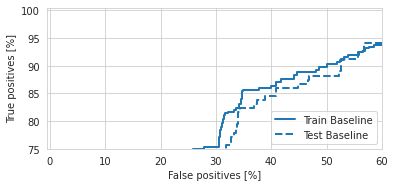

In [ ]:
base_train_pred = model.predict(X_train_enc, batch_size=BATCH_SIZE)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

plot_roc("Train Baseline", y_train_enc, base_train_pred, color=colors[0])
plot_roc("Test Baseline", y_test_enc, base_test_pred, color=colors[0], linestyle='--')
plt.legend(loc='lower right')

### **CNN**

In [ ]:
random.seed(seed_value)

np.random.seed(seed_value)

tf.random.set_seed(seed_value)
model = make_cnn_model(X_train_enc.shape[-1])
history = model.fit(
    X_train_enc.to_numpy().reshape(len(X_train_enc),X_train_enc.shape[-1],1),
    y_train_enc,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(X_val_enc.to_numpy().reshape(len(X_val_enc),X_val_enc.shape[-1],1), y_val_enc))

Epoch 1/1000
2/2 [==============================] - 3s 1s/step - loss: 0.9144 - tp: 459.6667 - fp: 1651.0000 - tn: 511.0000 - fn: 109.6667 - accuracy: 0.3554 - precision: 0.2178 - recall: 0.8074 - auc: 0.4968 - val_loss: 0.8160 - val_tp: 113.0000 - val_fp: 402.0000 - val_tn: 1.0000 - val_fn: 8.0000 - val_accuracy: 0.2176 - val_precision: 0.2194 - val_recall: 0.9339 - val_auc: 0.4178
Epoch 2/1000
2/2 [==============================] - 0s 56ms/step - loss: 0.7872 - tp: 371.0000 - fp: 1529.0000 - tn: 112.3333 - fn: 65.0000 - accuracy: 0.2327 - precision: 0.1953 - recall: 0.8509 - auc: 0.4290 - val_loss: 0.7089 - val_tp: 61.0000 - val_fp: 233.0000 - val_tn: 170.0000 - val_fn: 60.0000 - val_accuracy: 0.4408 - val_precision: 0.2075 - val_recall: 0.5041 - val_auc: 0.4295
Epoch 3/1000
2/2 [==============================] - 0s 56ms/step - loss: 0.6705 - tp: 81.0000 - fp: 391.0000 - tn: 1252.3333 - fn: 353.0000 - accuracy: 0.6418 - precision: 0.1716 - recall: 0.1867 - auc: 0.4275 - val_loss: 0.6

In [ ]:
#test results
results = model.evaluate(X_test_enc.to_numpy().reshape(len(X_test_enc),X_test_enc.shape[-1],1), y_test_enc, batch_size=BATCH_SIZE, verbose=0)

print("test results :")
for name, value in zip(model.metrics_names, results):
  print(name, ': ', value)
print()

test results :
loss :  0.35704806447029114
tp :  66.0
fp :  21.0
tn :  497.0
fn :  70.0
accuracy :  0.860856294631958
precision :  0.7586206793785095
recall :  0.4852941036224365
auc :  0.8437429070472717



              precision    recall  f1-score   support

           0       0.88      0.96      0.92       518
           1       0.76      0.49      0.59       136

    accuracy                           0.86       654
   macro avg       0.82      0.72      0.75       654
weighted avg       0.85      0.86      0.85       654



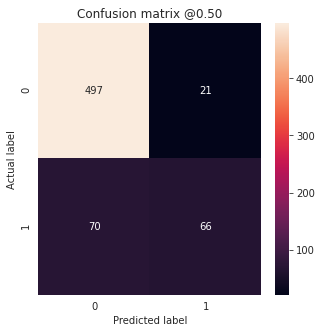

In [ ]:
cnn_test_pred = model.predict(X_test_enc.to_numpy().reshape(len(X_test_enc),X_test_enc.shape[-1],1), batch_size=BATCH_SIZE)
plot_cm(y_test_enc, cnn_test_pred)
a = cnn_test_pred > 0.5
print(classification_report(y_test_enc, a))

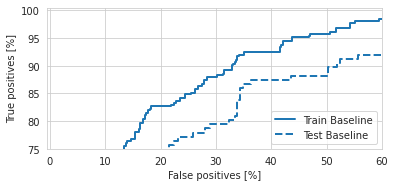

In [ ]:
cnn_train_pred = model.predict(X_train_enc.to_numpy().reshape(len(X_train_enc),X_train_enc.shape[-1],1), batch_size=BATCH_SIZE)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

plot_roc("Train Baseline", y_train_enc, cnn_train_pred, color=colors[0])
plot_roc("Test Baseline", y_test_enc, cnn_test_pred, color=colors[0], linestyle='--')
plt.legend(loc='lower right')

## **Weightened** 

In [ ]:
neg, pos = np.bincount(final_y)
total = neg + pos

weight_for_0 = (1 / neg)*(total)/2.0 
weight_for_1 = (1 / pos)*(total)/2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

initial_bias = np.log([pos/neg])


Weight for class 0: 0.63
Weight for class 1: 2.35


### **Base** 

In [ ]:
model = make_model(input_shape=X_train_enc.shape[-1],output_bias=initial_bias)
#weighted_model.load_weights()

history = model.fit(
    X_train_enc,
    y_train_enc,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(X_val_enc, y_val_enc),
    # The class weights go here
    class_weight=class_weight)

Epoch 1/1000
2/2 [==============================] - 3s 894ms/step - loss: 0.6959 - tp: 272.0000 - fp: 483.6667 - tn: 1678.3333 - fn: 297.3333 - accuracy: 0.7141 - precision: 0.3599 - recall: 0.4778 - auc: 0.6907 - val_loss: 0.5638 - val_tp: 60.0000 - val_fp: 70.0000 - val_tn: 333.0000 - val_fn: 61.0000 - val_accuracy: 0.7500 - val_precision: 0.4615 - val_recall: 0.4959 - val_auc: 0.7441
Epoch 2/1000
2/2 [==============================] - 0s 46ms/step - loss: 0.7322 - tp: 192.3333 - fp: 475.3333 - tn: 1166.0000 - fn: 243.6667 - accuracy: 0.6539 - precision: 0.2881 - recall: 0.4411 - auc: 0.6020 - val_loss: 0.5649 - val_tp: 60.0000 - val_fp: 73.0000 - val_tn: 330.0000 - val_fn: 61.0000 - val_accuracy: 0.7443 - val_precision: 0.4511 - val_recall: 0.4959 - val_auc: 0.7471
Epoch 3/1000
2/2 [==============================] - 0s 42ms/step - loss: 0.7093 - tp: 201.6667 - fp: 464.3333 - tn: 1179.0000 - fn: 232.3333 - accuracy: 0.6646 - precision: 0.3028 - recall: 0.4646 - auc: 0.6163 - val_loss

In [ ]:
#test results
results = model.evaluate(X_test_enc, y_test_enc, batch_size=BATCH_SIZE, verbose=0)

print("test results :")
for name, value in zip(model.metrics_names, results):
  print(name, ': ', value)
print()

test results :
loss :  0.489007830619812
tp :  96.0
fp :  99.0
tn :  419.0
fn :  40.0
accuracy :  0.7874617576599121
precision :  0.4923076927661896
recall :  0.7058823704719543
auc :  0.8353821039199829



              precision    recall  f1-score   support

           0       0.91      0.81      0.86       518
           1       0.49      0.71      0.58       136

    accuracy                           0.79       654
   macro avg       0.70      0.76      0.72       654
weighted avg       0.83      0.79      0.80       654



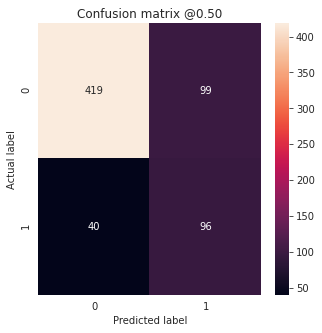

In [ ]:
base_test_pred_wei = model.predict(X_test_enc, batch_size=BATCH_SIZE)
plot_cm(y_test_enc, base_test_pred_wei)
a = base_test_pred_wei > 0.5
print(classification_report(y_test_enc, a))

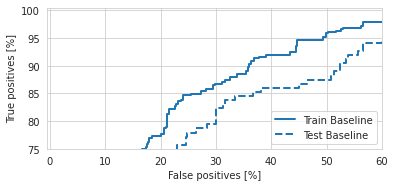

In [ ]:
base_train_pred_wei = model.predict(X_train_enc, batch_size=BATCH_SIZE)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

plot_roc("Train Baseline", y_train_enc, base_train_pred_wei, color=colors[0])
plot_roc("Test Baseline", y_test_enc, base_test_pred_wei, color=colors[0], linestyle='--')
plt.legend(loc='lower right')

### **CNN** 

In [ ]:
random.seed(seed_value)

np.random.seed(seed_value)

tf.random.set_seed(seed_value)
model = make_cnn_model(input_shape=X_train_enc.shape[-1])
history = model.fit(
    X_train_enc.to_numpy().reshape(len(X_train_enc),X_train_enc.shape[-1],1),
    y_train_enc,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(X_val_enc.to_numpy().reshape(len(X_val_enc),X_val_enc.shape[-1],1), y_val_enc),
    class_weight=class_weight
    )



make_cnn_model

Epoch 1/1000
2/2 [==============================] - 3s 1s/step - loss: 0.7485 - tp: 515.6667 - fp: 1742.0000 - tn: 420.0000 - fn: 53.6667 - accuracy: 0.3426 - precision: 0.2284 - recall: 0.9057 - auc: 0.5528 - val_loss: 0.8627 - val_tp: 120.0000 - val_fp: 403.0000 - val_tn: 0.0000e+00 - val_fn: 1.0000 - val_accuracy: 0.2290 - val_precision: 0.2294 - val_recall: 0.9917 - val_auc: 0.4193
Epoch 2/1000
2/2 [==============================] - 0s 59ms/step - loss: 0.7257 - tp: 415.0000 - fp: 1635.3333 - tn: 6.0000 - fn: 21.0000 - accuracy: 0.2027 - precision: 0.2024 - recall: 0.9518 - auc: 0.4528 - val_loss: 0.8133 - val_tp: 120.0000 - val_fp: 403.0000 - val_tn: 0.0000e+00 - val_fn: 1.0000 - val_accuracy: 0.2290 - val_precision: 0.2294 - val_recall: 0.9917 - val_auc: 0.4590
Epoch 3/1000
2/2 [==============================] - 0s 53ms/step - loss: 0.7073 - tp: 406.3333 - fp: 1589.0000 - tn: 54.3333 - fn: 27.6667 - accuracy: 0.2218 - precision: 0.2036 - recall: 0.9363 - auc: 0.4961 - val_loss: 0

<function __main__.make_cnn_model>

In [ ]:
#test results
results = model.evaluate(X_test_enc.to_numpy().reshape(len(X_test_enc),X_test_enc.shape[-1],1), y_test_enc, batch_size=BATCH_SIZE, verbose=0)

print("test results :")
for name, value in zip(model.metrics_names, results):
  print(name, ': ', value)
print()

test results :
loss :  0.4709640145301819
tp :  93.0
fp :  102.0
tn :  416.0
fn :  43.0
accuracy :  0.7782874703407288
precision :  0.4769230782985687
recall :  0.6838235259056091
auc :  0.8286892771720886



              precision    recall  f1-score   support

           0       0.91      0.80      0.85       518
           1       0.48      0.68      0.56       136

    accuracy                           0.78       654
   macro avg       0.69      0.74      0.71       654
weighted avg       0.82      0.78      0.79       654



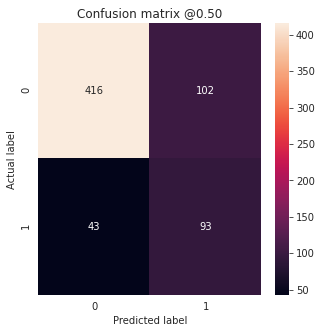

In [ ]:
cnn_test_pred_wei = model.predict(X_test_enc.to_numpy().reshape(len(X_test_enc),X_test_enc.shape[-1],1), batch_size=BATCH_SIZE)
plot_cm(y_test_enc, cnn_test_pred_wei)
a = cnn_test_pred_wei > 0.5
print(classification_report(y_test_enc, a))

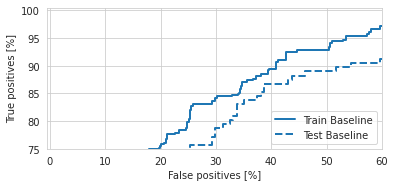

In [ ]:
cnn_train_pred_wei = model.predict(X_train_enc.to_numpy().reshape(len(X_train_enc),X_train_enc.shape[-1],1), batch_size=BATCH_SIZE)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

plot_roc("Train Baseline", y_train_enc, cnn_train_pred_wei, color=colors[0])
plot_roc("Test Baseline", y_test_enc, cnn_test_pred_wei, color=colors[0], linestyle='--')
plt.legend(loc='lower right')

##**Random oversampling**

###**Base**

In [ ]:
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
model = make_model(X_ros_enc.shape[-1])
history = model.fit(
    X_ros_enc,
    y_ros_enc,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(X_val_enc, y_val_enc))

Epoch 1/1000
2/2 [==============================] - 3s 912ms/step - loss: 0.9503 - tp: 1523.3333 - fp: 1544.3333 - tn: 421.0000 - fn: 53.3333 - accuracy: 0.5504 - precision: 0.4962 - recall: 0.9652 - auc: 0.5744 - val_loss: 1.2646 - val_tp: 121.0000 - val_fp: 403.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.2309 - val_precision: 0.2309 - val_recall: 1.0000 - val_auc: 0.4699
Epoch 2/1000
2/2 [==============================] - 0s 48ms/step - loss: 0.9244 - tp: 1437.6667 - fp: 1437.0000 - tn: 1.6667 - fn: 11.6667 - accuracy: 0.4992 - precision: 0.5009 - recall: 0.9921 - auc: 0.4500 - val_loss: 1.2488 - val_tp: 121.0000 - val_fp: 403.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.2309 - val_precision: 0.2309 - val_recall: 1.0000 - val_auc: 0.4761
Epoch 3/1000
2/2 [==============================] - 0s 376ms/step - loss: 0.9250 - tp: 1435.0000 - fp: 1433.6667 - tn: 5.6667 - fn: 13.6667 - accuracy: 0.4994 - precision: 0.5008 - recall: 0.9904 - auc: 0.4405

In [ ]:
#test results
results = model.evaluate(X_test_enc, y_test_enc, batch_size=BATCH_SIZE, verbose=0)

print("test results :")
for name, value in zip(model.metrics_names, results):
  print(name, ': ', value)
print()

test results :
loss :  0.38462233543395996
tp :  106.0
fp :  103.0
tn :  415.0
fn :  30.0
accuracy :  0.7966361045837402
precision :  0.5071770548820496
recall :  0.779411792755127
auc :  0.881380558013916



              precision    recall  f1-score   support

           0       0.93      0.80      0.86       518
           1       0.51      0.78      0.61       136

    accuracy                           0.80       654
   macro avg       0.72      0.79      0.74       654
weighted avg       0.84      0.80      0.81       654



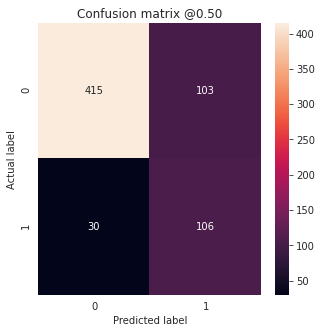

In [ ]:
base_test_pred_ros = model.predict(X_test_enc, batch_size=BATCH_SIZE)
plot_cm(y_test_enc, base_test_pred_ros)
a = base_test_pred_ros > 0.5
print(classification_report(y_test_enc, a))

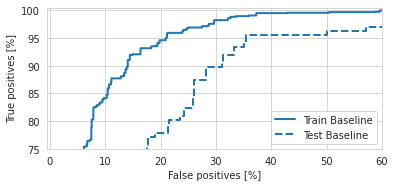

In [ ]:
base_train_pred_ros = model.predict(X_ros_enc, batch_size=BATCH_SIZE)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

plot_roc("Train Baseline", y_ros_enc, base_train_pred_ros, color=colors[0])
plot_roc("Test Baseline", y_test_enc, base_test_pred_ros, color=colors[0], linestyle='--')
plt.legend(loc='lower right')

### **CNN**

In [ ]:
random.seed(seed_value)

np.random.seed(seed_value)

tf.random.set_seed(seed_value)
model = make_cnn_model(X_ros_enc.shape[-1])
history = model.fit(
    X_ros_enc.reshape(len(X_ros_enc),X_ros_enc.shape[-1],1),
    y_ros_enc,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(X_val_enc.to_numpy().reshape(len(X_val_enc),X_val_enc.shape[-1],1), y_val_enc))

Epoch 1/1000
2/2 [==============================] - 3s 982ms/step - loss: 0.7471 - tp: 1496.3333 - fp: 1547.0000 - tn: 418.3333 - fn: 80.3333 - accuracy: 0.5424 - precision: 0.4915 - recall: 0.9490 - auc: 0.5651 - val_loss: 0.8261 - val_tp: 120.0000 - val_fp: 403.0000 - val_tn: 0.0000e+00 - val_fn: 1.0000 - val_accuracy: 0.2290 - val_precision: 0.2294 - val_recall: 0.9917 - val_auc: 0.4373
Epoch 2/1000
2/2 [==============================] - 0s 123ms/step - loss: 0.7148 - tp: 1304.6667 - fp: 1348.0000 - tn: 90.6667 - fn: 144.6667 - accuracy: 0.4826 - precision: 0.4919 - recall: 0.9030 - auc: 0.4609 - val_loss: 0.7451 - val_tp: 110.0000 - val_fp: 376.0000 - val_tn: 27.0000 - val_fn: 11.0000 - val_accuracy: 0.2615 - val_precision: 0.2263 - val_recall: 0.9091 - val_auc: 0.5027
Epoch 3/1000
2/2 [==============================] - 0s 131ms/step - loss: 0.6980 - tp: 795.0000 - fp: 760.0000 - tn: 679.3333 - fn: 653.6667 - accuracy: 0.5103 - precision: 0.5114 - recall: 0.5566 - auc: 0.5128 - val

In [ ]:
#test results
results = model.evaluate(X_test_enc.to_numpy().reshape(len(X_test_enc),X_test_enc.shape[-1],1), y_test_enc, batch_size=BATCH_SIZE, verbose=0)

print("test results :")
for name, value in zip(model.metrics_names, results):
  print(name, ': ', value)
print()

test results :
loss :  0.19226513803005219
tp :  119.0
fp :  15.0
tn :  503.0
fn :  17.0
accuracy :  0.9510703086853027
precision :  0.888059675693512
recall :  0.875
auc :  0.9556553363800049



              precision    recall  f1-score   support

           0       0.97      0.97      0.97       518
           1       0.89      0.88      0.88       136

    accuracy                           0.95       654
   macro avg       0.93      0.92      0.93       654
weighted avg       0.95      0.95      0.95       654



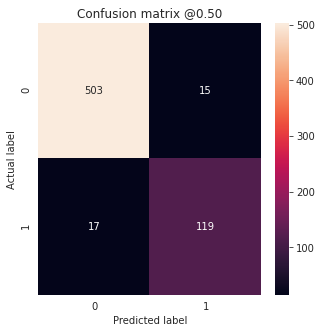

In [ ]:
cnn_test_pred_ros = model.predict(X_test_enc.to_numpy().reshape(len(X_test_enc),X_test_enc.shape[-1],1), batch_size=BATCH_SIZE)
plot_cm(y_test_enc, cnn_test_pred_ros)
a = cnn_test_pred_ros > 0.5
print(classification_report(y_test_enc, a))

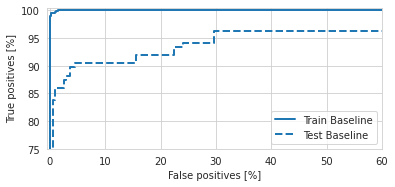

In [ ]:
cnn_train_pred_ros = model.predict(X_ros_enc.reshape(len(X_ros_enc),X_ros_enc.shape[-1],1), batch_size=BATCH_SIZE)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

plot_roc("Train Baseline", y_ros_enc, cnn_train_pred_ros, color=colors[0])
plot_roc("Test Baseline", y_test_enc, cnn_test_pred_ros, color=colors[0], linestyle='--')
plt.legend(loc='lower right')

##**Random undersampling**

###**Base**

In [ ]:
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
model = make_model(X_rus_enc.shape[-1])
history = model.fit(
    X_rus_enc,
    y_rus_enc,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(X_val_enc, y_val_enc))

Epoch 1/1000
1/1 [==============================] - 3s 3s/step - loss: 0.9440 - tp: 553.0000 - fp: 451.0000 - tn: 505.0000 - fn: 21.0000 - accuracy: 0.6915 - precision: 0.5508 - recall: 0.9634 - auc: 0.7678 - val_loss: 1.2725 - val_tp: 121.0000 - val_fp: 403.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.2309 - val_precision: 0.2309 - val_recall: 1.0000 - val_auc: 0.4689
Epoch 2/1000
1/1 [==============================] - 0s 49ms/step - loss: 0.9217 - tp: 437.0000 - fp: 437.0000 - tn: 1.0000 - fn: 1.0000 - accuracy: 0.5000 - precision: 0.5000 - recall: 0.9977 - auc: 0.4641 - val_loss: 1.2646 - val_tp: 121.0000 - val_fp: 403.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.2309 - val_precision: 0.2309 - val_recall: 1.0000 - val_auc: 0.4715
Epoch 3/1000
1/1 [==============================] - 0s 383ms/step - loss: 0.9211 - tp: 434.0000 - fp: 437.0000 - tn: 1.0000 - fn: 4.0000 - accuracy: 0.4966 - precision: 0.4983 - recall: 0.9909 - auc: 0.4554 - val_loss

In [ ]:
#test results
results = model.evaluate(X_test_enc, y_test_enc, batch_size=BATCH_SIZE, verbose=0)

print("test results :")
for name, value in zip(model.metrics_names, results):
  print(name, ': ', value)
print()

test results :
loss :  0.5040798783302307
tp :  108.0
fp :  150.0
tn :  368.0
fn :  28.0
accuracy :  0.7278287410736084
precision :  0.41860464215278625
recall :  0.7941176295280457
auc :  0.8383843302726746



              precision    recall  f1-score   support

           0       0.93      0.71      0.81       518
           1       0.42      0.79      0.55       136

    accuracy                           0.73       654
   macro avg       0.67      0.75      0.68       654
weighted avg       0.82      0.73      0.75       654



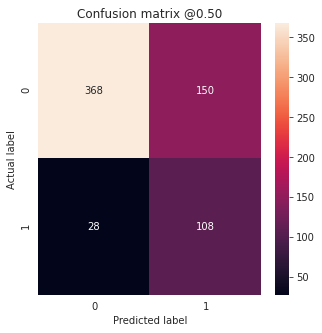

In [ ]:
base_test_pred_rus = model.predict(X_test_enc, batch_size=BATCH_SIZE)
plot_cm(y_test_enc, base_test_pred_rus)
a = base_test_pred_rus > 0.5
print(classification_report(y_test_enc, a))

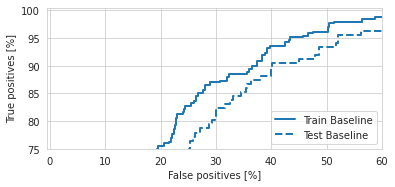

In [ ]:
base_train_pred_rus = model.predict(X_rus_enc, batch_size=BATCH_SIZE)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

plot_roc("Train Baseline", y_rus_enc, base_train_pred_rus, color=colors[0])
plot_roc("Test Baseline", y_test_enc, base_test_pred_rus, color=colors[0], linestyle='--')
plt.legend(loc='lower right')

### CNN

In [ ]:
random.seed(seed_value)

np.random.seed(seed_value)

tf.random.set_seed(seed_value)
model = make_cnn_model(X_rus_enc.shape[-1])
history = model.fit(
    X_rus_enc.reshape(len(X_rus_enc),X_rus_enc.shape[-1],1),
    y_rus_enc,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(X_val_enc.to_numpy().reshape(len(X_val_enc),X_val_enc.shape[-1],1), y_val_enc))

Epoch 1/1000
1/1 [==============================] - 3s 3s/step - loss: 0.7515 - tp: 530.0000 - fp: 588.0000 - tn: 368.0000 - fn: 44.0000 - accuracy: 0.5869 - precision: 0.4741 - recall: 0.9233 - auc: 0.6656 - val_loss: 0.8760 - val_tp: 120.0000 - val_fp: 403.0000 - val_tn: 0.0000e+00 - val_fn: 1.0000 - val_accuracy: 0.2290 - val_precision: 0.2294 - val_recall: 0.9917 - val_auc: 0.4172
Epoch 2/1000
1/1 [==============================] - 0s 99ms/step - loss: 0.7332 - tp: 416.0000 - fp: 437.0000 - tn: 1.0000 - fn: 22.0000 - accuracy: 0.4760 - precision: 0.4877 - recall: 0.9498 - auc: 0.4509 - val_loss: 0.8290 - val_tp: 120.0000 - val_fp: 403.0000 - val_tn: 0.0000e+00 - val_fn: 1.0000 - val_accuracy: 0.2290 - val_precision: 0.2294 - val_recall: 0.9917 - val_auc: 0.4374
Epoch 3/1000
1/1 [==============================] - 0s 101ms/step - loss: 0.7187 - tp: 408.0000 - fp: 430.0000 - tn: 8.0000 - fn: 30.0000 - accuracy: 0.4749 - precision: 0.4869 - recall: 0.9315 - auc: 0.4602 - val_loss: 0.78

In [ ]:
#test results
results = model.evaluate(X_test_enc.to_numpy().reshape(len(X_test_enc),X_test_enc.shape[-1],1), y_test_enc, batch_size=BATCH_SIZE, verbose=0)

print("test results :")
for name, value in zip(model.metrics_names, results):
  print(name, ': ', value)
print()

test results :
loss :  0.3951719403266907
tp :  121.0
fp :  80.0
tn :  438.0
fn :  15.0
accuracy :  0.8547400832176208
precision :  0.6019900441169739
recall :  0.8897058963775635
auc :  0.9165695905685425



              precision    recall  f1-score   support

           0       0.97      0.85      0.90       518
           1       0.60      0.89      0.72       136

    accuracy                           0.85       654
   macro avg       0.78      0.87      0.81       654
weighted avg       0.89      0.85      0.86       654



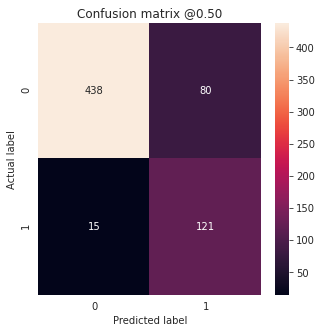

In [ ]:
cnn_test_pred_rus = model.predict(X_test_enc.to_numpy().reshape(len(X_test_enc),X_test_enc.shape[-1],1), batch_size=BATCH_SIZE)
plot_cm(y_test_enc, cnn_test_pred_rus)
a = cnn_test_pred_rus > 0.5
print(classification_report(y_test_enc, a))

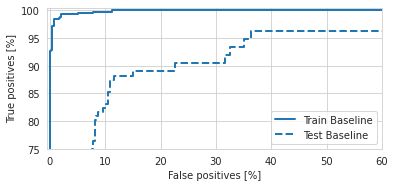

In [ ]:
cnn_train_pred_rus = model.predict(X_rus_enc.reshape(len(X_rus_enc),X_rus_enc.shape[-1],1), batch_size=BATCH_SIZE)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

plot_roc("Train Baseline", y_rus_enc, cnn_train_pred_rus, color=colors[0])
plot_roc("Test Baseline", y_test_enc, cnn_test_pred_rus, color=colors[0], linestyle='--')
plt.legend(loc='lower right')

##**tomeklinks**

###**Base**

In [ ]:
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
model = make_model(X_tom_enc.shape[-1])
history = model.fit(
    X_tom_enc,
    y_tom_enc,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(X_val_enc, y_val_enc))

Epoch 1/1000
2/2 [==============================] - 3s 949ms/step - loss: 1.3340 - tp: 552.0000 - fp: 1717.0000 - tn: 444.0000 - fn: 17.0000 - accuracy: 0.3648 - precision: 0.2433 - recall: 0.9701 - auc: 0.5986 - val_loss: 1.2652 - val_tp: 121.0000 - val_fp: 403.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.2309 - val_precision: 0.2309 - val_recall: 1.0000 - val_auc: 0.4696
Epoch 2/1000
2/2 [==============================] - 0s 46ms/step - loss: 1.3120 - tp: 431.3333 - fp: 1632.6667 - tn: 9.0000 - fn: 3.0000 - accuracy: 0.2121 - precision: 0.2090 - recall: 0.9931 - auc: 0.4465 - val_loss: 1.2508 - val_tp: 121.0000 - val_fp: 403.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.2309 - val_precision: 0.2309 - val_recall: 1.0000 - val_auc: 0.4713
Epoch 3/1000
2/2 [==============================] - 0s 42ms/step - loss: 1.3016 - tp: 429.0000 - fp: 1634.0000 - tn: 8.0000 - fn: 5.0000 - accuracy: 0.2105 - precision: 0.2079 - recall: 0.9885 - auc: 0.4440 - val

In [ ]:
#test results
results = model.evaluate(X_test_enc, y_test_enc, batch_size=BATCH_SIZE, verbose=0)

print("test results :")
for name, value in zip(model.metrics_names, results):
  print(name, ': ', value)
print()

test results :
loss :  0.3979554772377014
tp :  43.0
fp :  11.0
tn :  507.0
fn :  93.0
accuracy :  0.8409786224365234
precision :  0.7962962985038757
recall :  0.31617647409439087
auc :  0.8051754236221313



              precision    recall  f1-score   support

           0       0.84      0.98      0.91       518
           1       0.80      0.32      0.45       136

    accuracy                           0.84       654
   macro avg       0.82      0.65      0.68       654
weighted avg       0.83      0.84      0.81       654



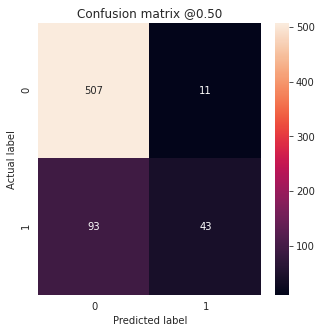

In [ ]:
base_test_pred_tom = model.predict(X_test_enc, batch_size=BATCH_SIZE)
plot_cm(y_test_enc, base_test_pred_tom)
a = base_test_pred_tom > 0.5
print(classification_report(y_test_enc, a))

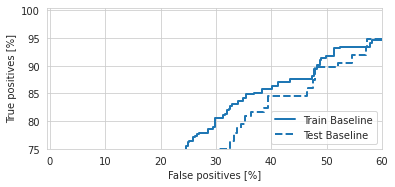

In [ ]:
base_train_pred_tom = model.predict(X_tom_enc, batch_size=BATCH_SIZE)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

plot_roc("Train Baseline", y_tom_enc, base_train_pred_tom, color=colors[0])
plot_roc("Test Baseline", y_test_enc, base_test_pred_tom, color=colors[0], linestyle='--')
plt.legend(loc='lower right')

###**CNN**

In [ ]:
random.seed(seed_value)

np.random.seed(seed_value)

tf.random.set_seed(seed_value)
model = make_cnn_model(X_tom_enc.shape[-1])
history = model.fit(
    X_tom_enc.reshape(len(X_tom_enc),X_tom_enc.shape[-1],1),
    y_tom_enc,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(X_val_enc.to_numpy().reshape(len(X_val_enc),X_val_enc.shape[-1],1), y_val_enc))

Epoch 1/1000
2/2 [==============================] - 3s 953ms/step - loss: 0.9162 - tp: 459.3333 - fp: 1650.3333 - tn: 510.6667 - fn: 109.6667 - accuracy: 0.3553 - precision: 0.2177 - recall: 0.8072 - auc: 0.4845 - val_loss: 0.8170 - val_tp: 116.0000 - val_fp: 402.0000 - val_tn: 1.0000 - val_fn: 5.0000 - val_accuracy: 0.2233 - val_precision: 0.2239 - val_recall: 0.9587 - val_auc: 0.4128
Epoch 2/1000
2/2 [==============================] - 0s 55ms/step - loss: 0.7877 - tp: 367.0000 - fp: 1514.3333 - tn: 127.3333 - fn: 67.3333 - accuracy: 0.2381 - precision: 0.1951 - recall: 0.8450 - auc: 0.4492 - val_loss: 0.7124 - val_tp: 65.0000 - val_fp: 250.0000 - val_tn: 153.0000 - val_fn: 56.0000 - val_accuracy: 0.4160 - val_precision: 0.2063 - val_recall: 0.5372 - val_auc: 0.4250
Epoch 3/1000
2/2 [==============================] - 0s 65ms/step - loss: 0.6701 - tp: 91.0000 - fp: 400.6667 - tn: 1241.3333 - fn: 343.0000 - accuracy: 0.6418 - precision: 0.1851 - recall: 0.2097 - auc: 0.4421 - val_loss: 

In [ ]:
#test results
results = model.evaluate(X_test_enc.to_numpy().reshape(len(X_test_enc),X_test_enc.shape[-1],1), y_test_enc, batch_size=BATCH_SIZE, verbose=0)

print("test results :")
for name, value in zip(model.metrics_names, results):
  print(name, ': ', value)
print()

test results :
loss :  0.3650159239768982
tp :  52.0
fp :  8.0
tn :  510.0
fn :  84.0
accuracy :  0.8593271970748901
precision :  0.8666666746139526
recall :  0.38235294818878174
auc :  0.8353891968727112



              precision    recall  f1-score   support

           0       0.86      0.98      0.92       518
           1       0.87      0.38      0.53       136

    accuracy                           0.86       654
   macro avg       0.86      0.68      0.72       654
weighted avg       0.86      0.86      0.84       654



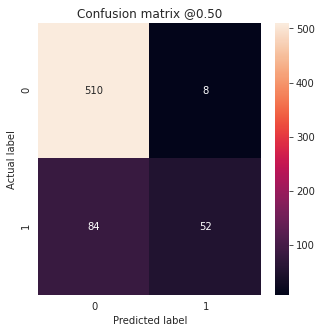

In [ ]:
cnn_test_pred_tom = model.predict(X_test_enc.to_numpy().reshape(len(X_test_enc),X_test_enc.shape[-1],1), batch_size=BATCH_SIZE)
plot_cm(y_test_enc, cnn_test_pred_tom)
a = cnn_test_pred_tom > 0.5
print(classification_report(y_test_enc, a))

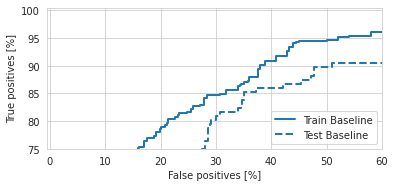

In [ ]:
cnn_train_pred_tom = model.predict(X_tom_enc.reshape(len(X_tom_enc),X_tom_enc.shape[-1],1), batch_size=BATCH_SIZE)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

plot_roc("Train Baseline", y_tom_enc, cnn_train_pred_tom, color=colors[0])
plot_roc("Test Baseline", y_test_enc, cnn_test_pred_tom, color=colors[0], linestyle='--')
plt.legend(loc='lower right')

##**SMOTE**

###**Base**

In [ ]:
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
model = make_model(X_smt_enc.shape[-1])
history = model.fit(
    X_smt_enc,
    y_smt_enc,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(X_val_enc, y_val_enc))

Epoch 1/1000
2/2 [==============================] - 3s 931ms/step - loss: 0.9490 - tp: 1487.6667 - fp: 1450.3333 - tn: 515.0000 - fn: 89.0000 - accuracy: 0.5673 - precision: 0.5063 - recall: 0.9413 - auc: 0.5671 - val_loss: 1.2646 - val_tp: 121.0000 - val_fp: 403.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.2309 - val_precision: 0.2309 - val_recall: 1.0000 - val_auc: 0.4711
Epoch 2/1000
2/2 [==============================] - 0s 48ms/step - loss: 0.9228 - tp: 1443.3333 - fp: 1437.0000 - tn: 1.6667 - fn: 6.0000 - accuracy: 0.5011 - precision: 0.5019 - recall: 0.9959 - auc: 0.4500 - val_loss: 1.2488 - val_tp: 121.0000 - val_fp: 403.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.2309 - val_precision: 0.2309 - val_recall: 1.0000 - val_auc: 0.4754
Epoch 3/1000
2/2 [==============================] - 0s 47ms/step - loss: 0.9219 - tp: 1446.3333 - fp: 1433.6667 - tn: 5.6667 - fn: 2.3333 - accuracy: 0.5034 - precision: 0.5029 - recall: 0.9985 - auc: 0.4434 - 

In [ ]:
#test results
results = model.evaluate(X_test_enc, y_test_enc, batch_size=BATCH_SIZE, verbose=0)

print("test results :")
for name, value in zip(model.metrics_names, results):
  print(name, ': ', value)
print()

test results :
loss :  0.42315492033958435
tp :  106.0
fp :  109.0
tn :  409.0
fn :  30.0
accuracy :  0.7874617576599121
precision :  0.49302324652671814
recall :  0.779411792755127
auc :  0.8582358360290527



              precision    recall  f1-score   support

           0       0.93      0.79      0.85       518
           1       0.49      0.78      0.60       136

    accuracy                           0.79       654
   macro avg       0.71      0.78      0.73       654
weighted avg       0.84      0.79      0.80       654



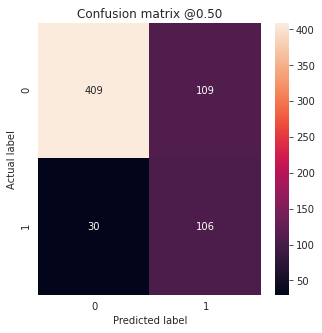

In [ ]:
base_test_pred_smt = model.predict(X_test_enc, batch_size=BATCH_SIZE)
plot_cm(y_test_enc, base_test_pred_smt)
a = base_test_pred_smt > 0.5
print(classification_report(y_test_enc, a))

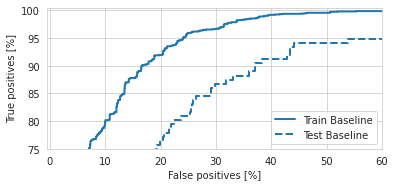

In [ ]:
base_train_pred_smt = model.predict(X_smt_enc, batch_size=BATCH_SIZE)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

plot_roc("Train Baseline", y_smt_enc, base_train_pred_smt, color=colors[0])
plot_roc("Test Baseline", y_test_enc, base_test_pred_smt, color=colors[0], linestyle='--')
plt.legend(loc='lower right')

###**CNN**

In [ ]:
random.seed(seed_value)

np.random.seed(seed_value)

tf.random.set_seed(seed_value)
model = make_cnn_model(X_smt_enc.shape[-1])
history = model.fit(
    X_smt_enc.reshape(len(X_smt_enc),X_smt_enc.shape[-1],1),
    y_smt_enc,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(X_val_enc.to_numpy().reshape(len(X_val_enc),X_val_enc.shape[-1],1), y_val_enc))

Epoch 1/1000
2/2 [==============================] - 3s 1s/step - loss: 0.7468 - tp: 1489.6667 - fp: 1553.0000 - tn: 412.3333 - fn: 87.0000 - accuracy: 0.5389 - precision: 0.4894 - recall: 0.9451 - auc: 0.5622 - val_loss: 0.8263 - val_tp: 120.0000 - val_fp: 403.0000 - val_tn: 0.0000e+00 - val_fn: 1.0000 - val_accuracy: 0.2290 - val_precision: 0.2294 - val_recall: 0.9917 - val_auc: 0.4356
Epoch 2/1000
2/2 [==============================] - 0s 131ms/step - loss: 0.7122 - tp: 1307.3333 - fp: 1346.6667 - tn: 92.0000 - fn: 142.0000 - accuracy: 0.4836 - precision: 0.4926 - recall: 0.9044 - auc: 0.4911 - val_loss: 0.7426 - val_tp: 109.0000 - val_fp: 371.0000 - val_tn: 32.0000 - val_fn: 12.0000 - val_accuracy: 0.2691 - val_precision: 0.2271 - val_recall: 0.9008 - val_auc: 0.4964
Epoch 3/1000
2/2 [==============================] - 0s 131ms/step - loss: 0.6911 - tp: 848.3333 - fp: 726.6667 - tn: 712.6667 - fn: 600.3333 - accuracy: 0.5403 - precision: 0.5385 - recall: 0.5941 - auc: 0.5575 - val_lo

In [ ]:
#test results
results = model.evaluate(X_test_enc.to_numpy().reshape(len(X_test_enc),X_test_enc.shape[-1],1), y_test_enc, batch_size=BATCH_SIZE, verbose=0)

print("test results :")
for name, value in zip(model.metrics_names, results):
  print(name, ': ', value)
print()

test results :
loss :  0.2205158919095993
tp :  110.0
fp :  14.0
tn :  504.0
fn :  26.0
accuracy :  0.9388379454612732
precision :  0.8870967626571655
recall :  0.8088235259056091
auc :  0.9453496932983398



              precision    recall  f1-score   support

           0       0.95      0.97      0.96       518
           1       0.89      0.81      0.85       136

    accuracy                           0.94       654
   macro avg       0.92      0.89      0.90       654
weighted avg       0.94      0.94      0.94       654



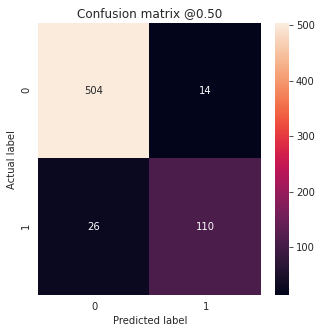

In [ ]:
cnn_test_pred_smt = model.predict(X_test_enc.to_numpy().reshape(len(X_test_enc),X_test_enc.shape[-1],1), batch_size=BATCH_SIZE)
plot_cm(y_test_enc, cnn_test_pred_smt)
a = cnn_test_pred_smt > 0.5
print(classification_report(y_test_enc, a))

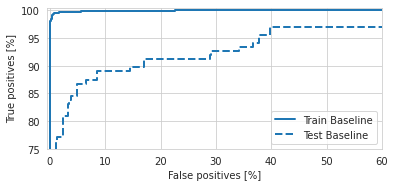

In [ ]:
cnn_train_pred_smt = model.predict(X_smt_enc.reshape(len(X_smt_enc),X_smt_enc.shape[-1],1), batch_size=BATCH_SIZE)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

plot_roc("Train Baseline", y_smt_enc, cnn_train_pred_smt, color=colors[0])
plot_roc("Test Baseline", y_test_enc, cnn_test_pred_smt, color=colors[0], linestyle='--')
plt.legend(loc='lower right')

##**Adasyn**

###**Base**

In [ ]:
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
model = make_model(X_ads_enc.shape[-1])
history = model.fit(
    X_ads_enc,
    y_ads_enc,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(X_val_enc, y_val_enc))

Epoch 1/1000
2/2 [==============================] - 3s 926ms/step - loss: 0.9491 - tp: 1518.3333 - fp: 1457.3333 - tn: 509.0000 - fn: 37.3333 - accuracy: 0.5782 - precision: 0.5109 - recall: 0.9753 - auc: 0.6104 - val_loss: 1.2644 - val_tp: 121.0000 - val_fp: 403.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.2309 - val_precision: 0.2309 - val_recall: 1.0000 - val_auc: 0.4705
Epoch 2/1000
2/2 [==============================] - 0s 47ms/step - loss: 0.9410 - tp: 1413.3333 - fp: 1442.3333 - tn: 5.6667 - fn: 6.6667 - accuracy: 0.4946 - precision: 0.4948 - recall: 0.9954 - auc: 0.4370 - val_loss: 1.2486 - val_tp: 121.0000 - val_fp: 403.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.2309 - val_precision: 0.2309 - val_recall: 1.0000 - val_auc: 0.4738
Epoch 3/1000
2/2 [==============================] - 0s 48ms/step - loss: 0.9361 - tp: 1409.0000 - fp: 1442.0000 - tn: 7.6667 - fn: 9.3333 - accuracy: 0.4936 - precision: 0.4939 - recall: 0.9935 - auc: 0.4352 - 

In [ ]:
#test results
results = model.evaluate(X_test_enc, y_test_enc, batch_size=BATCH_SIZE, verbose=0)

print("test results :")
for name, value in zip(model.metrics_names, results):
  print(name, ': ', value)
print()

test results :
loss :  0.3888602554798126
tp :  109.0
fp :  99.0
tn :  419.0
fn :  27.0
accuracy :  0.8073394298553467
precision :  0.5240384340286255
recall :  0.8014705777168274
auc :  0.8853551149368286



              precision    recall  f1-score   support

           0       0.94      0.81      0.87       518
           1       0.52      0.80      0.63       136

    accuracy                           0.81       654
   macro avg       0.73      0.81      0.75       654
weighted avg       0.85      0.81      0.82       654



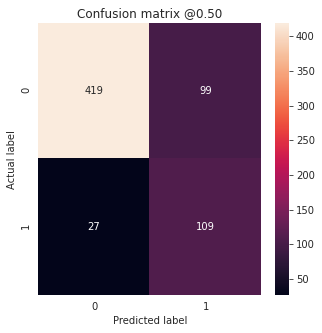

In [ ]:
base_test_pred_ads = model.predict(X_test_enc, batch_size=BATCH_SIZE)
plot_cm(y_test_enc, base_test_pred_ads)
a = base_test_pred_ads > 0.5
print(classification_report(y_test_enc, a))

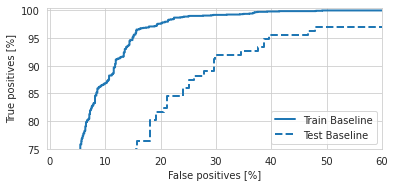

In [ ]:
base_train_pred_ads = model.predict(X_ads_enc, batch_size=BATCH_SIZE)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

plot_roc("Train Baseline", y_ads_enc, base_train_pred_ads, color=colors[0])
plot_roc("Test Baseline", y_test_enc, base_test_pred_ads, color=colors[0], linestyle='--')
plt.legend(loc='lower right')

###**CNN**

In [ ]:
random.seed(seed_value)

np.random.seed(seed_value)

tf.random.set_seed(seed_value)
model = make_cnn_model(X_ads_enc.shape[-1])
history = model.fit(
    X_ads_enc.reshape(len(X_ads_enc),X_ads_enc.shape[-1],1),
    y_ads_enc,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(X_val_enc.to_numpy().reshape(len(X_val_enc),X_val_enc.shape[-1],1), y_val_enc))

Epoch 1/1000
2/2 [==============================] - 3s 1s/step - loss: 0.7385 - tp: 1505.6667 - fp: 1544.0000 - tn: 422.3333 - fn: 50.0000 - accuracy: 0.5492 - precision: 0.4937 - recall: 0.9675 - auc: 0.6090 - val_loss: 0.8153 - val_tp: 113.0000 - val_fp: 402.0000 - val_tn: 1.0000 - val_fn: 8.0000 - val_accuracy: 0.2176 - val_precision: 0.2194 - val_recall: 0.9339 - val_auc: 0.4280
Epoch 2/1000
2/2 [==============================] - 0s 124ms/step - loss: 0.7036 - tp: 1261.0000 - fp: 1252.6667 - tn: 195.3333 - fn: 159.0000 - accuracy: 0.5074 - precision: 0.5014 - recall: 0.8945 - auc: 0.5282 - val_loss: 0.7220 - val_tp: 78.0000 - val_fp: 295.0000 - val_tn: 108.0000 - val_fn: 43.0000 - val_accuracy: 0.3550 - val_precision: 0.2091 - val_recall: 0.6446 - val_auc: 0.4587
Epoch 3/1000
2/2 [==============================] - 0s 127ms/step - loss: 0.6911 - tp: 546.0000 - fp: 439.6667 - tn: 1010.0000 - fn: 872.3333 - accuracy: 0.5428 - precision: 0.5533 - recall: 0.3925 - auc: 0.5698 - val_loss

In [ ]:
#test results
results = model.evaluate(X_test_enc.to_numpy().reshape(len(X_test_enc),X_test_enc.shape[-1],1), y_test_enc, batch_size=BATCH_SIZE, verbose=0)

print("test results :")
for name, value in zip(model.metrics_names, results):
  print(name, ': ', value)
print()

test results :
loss :  0.24840962886810303
tp :  106.0
fp :  18.0
tn :  500.0
fn :  30.0
accuracy :  0.9266055226325989
precision :  0.8548387289047241
recall :  0.779411792755127
auc :  0.9320846796035767



              precision    recall  f1-score   support

           0       0.94      0.97      0.95       518
           1       0.85      0.78      0.82       136

    accuracy                           0.93       654
   macro avg       0.90      0.87      0.88       654
weighted avg       0.92      0.93      0.93       654



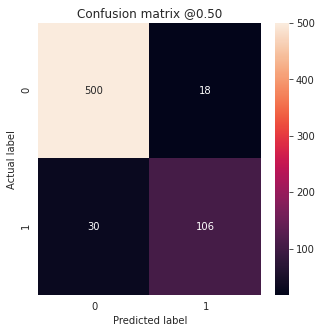

In [ ]:
cnn_test_pred_ads = model.predict(X_test_enc.to_numpy().reshape(len(X_test_enc),X_test_enc.shape[-1],1), batch_size=BATCH_SIZE)
plot_cm(y_test_enc, cnn_test_pred_ads)
a = cnn_test_pred_ads > 0.5
print(classification_report(y_test_enc, a))

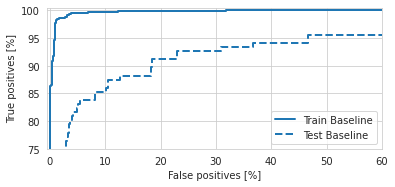

In [ ]:
cnn_train_pred_ads = model.predict(X_ads_enc.reshape(len(X_ads_enc),X_ads_enc.shape[-1],1), batch_size=BATCH_SIZE)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

plot_roc("Train Baseline", y_ads_enc, cnn_train_pred_ads, color=colors[0])
plot_roc("Test Baseline", y_test_enc, cnn_test_pred_ads, color=colors[0], linestyle='--')
plt.legend(loc='lower right')

##**SMOTE plus TOMEK**

###**Base**

In [ ]:
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
model = make_model(X_smtom_enc.shape[-1])
history = model.fit(
    X_smtom_enc,
    y_smtom_enc,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(X_val_enc, y_val_enc))

Epoch 1/1000
2/2 [==============================] - 3s 922ms/step - loss: 0.9490 - tp: 1541.6667 - fp: 1460.3333 - tn: 505.0000 - fn: 35.0000 - accuracy: 0.5801 - precision: 0.5138 - recall: 0.9770 - auc: 0.5908 - val_loss: 1.2646 - val_tp: 121.0000 - val_fp: 403.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.2309 - val_precision: 0.2309 - val_recall: 1.0000 - val_auc: 0.4711
Epoch 2/1000
2/2 [==============================] - 0s 48ms/step - loss: 0.9228 - tp: 1443.3333 - fp: 1437.0000 - tn: 1.6667 - fn: 6.0000 - accuracy: 0.5011 - precision: 0.5019 - recall: 0.9959 - auc: 0.4500 - val_loss: 1.2488 - val_tp: 121.0000 - val_fp: 403.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.2309 - val_precision: 0.2309 - val_recall: 1.0000 - val_auc: 0.4754
Epoch 3/1000
2/2 [==============================] - 0s 49ms/step - loss: 0.9219 - tp: 1446.3333 - fp: 1433.6667 - tn: 5.6667 - fn: 2.3333 - accuracy: 0.5034 - precision: 0.5029 - recall: 0.9985 - auc: 0.4434 - 

In [ ]:
#test results
results = model.evaluate(X_test_enc, y_test_enc, batch_size=BATCH_SIZE, verbose=0)

print("test results :")
for name, value in zip(model.metrics_names, results):
  print(name, ': ', value)
print()

test results :
loss :  0.42315492033958435
tp :  106.0
fp :  109.0
tn :  409.0
fn :  30.0
accuracy :  0.7874617576599121
precision :  0.49302324652671814
recall :  0.779411792755127
auc :  0.8582358360290527



              precision    recall  f1-score   support

           0       0.93      0.79      0.85       518
           1       0.49      0.78      0.60       136

    accuracy                           0.79       654
   macro avg       0.71      0.78      0.73       654
weighted avg       0.84      0.79      0.80       654



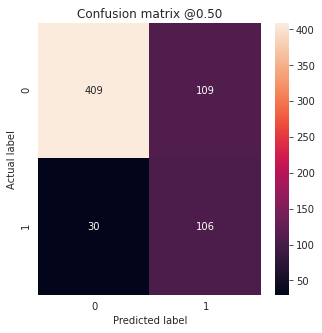

In [ ]:
base_test_pred_smtom = model.predict(X_test_enc, batch_size=BATCH_SIZE)
plot_cm(y_test_enc, base_test_pred_smtom)
a = base_test_pred_smtom > 0.5
print(classification_report(y_test_enc, a))

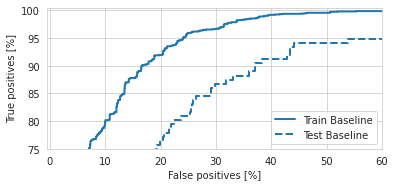

In [ ]:
base_train_pred_smtom = model.predict(X_smtom_enc, batch_size=BATCH_SIZE)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

plot_roc("Train Baseline", y_smtom_enc, base_train_pred_smtom, color=colors[0])
plot_roc("Test Baseline", y_test_enc, base_test_pred_smtom, color=colors[0], linestyle='--')
plt.legend(loc='lower right')

###**CNN**

In [ ]:
random.seed(seed_value)

np.random.seed(seed_value)

tf.random.set_seed(seed_value)
model = make_cnn_model(X_smtom_enc.shape[-1])
history = model.fit(
    X_smtom_enc.reshape(len(X_smtom_enc),X_smtom_enc.shape[-1],1),
    y_smtom_enc,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(X_val_enc.to_numpy().reshape(len(X_val_enc),X_val_enc.shape[-1],1), y_val_enc))

Epoch 1/1000
2/2 [==============================] - 3s 1s/step - loss: 0.7468 - tp: 1489.6667 - fp: 1553.0000 - tn: 412.3333 - fn: 87.0000 - accuracy: 0.5389 - precision: 0.4894 - recall: 0.9451 - auc: 0.5622 - val_loss: 0.8263 - val_tp: 120.0000 - val_fp: 403.0000 - val_tn: 0.0000e+00 - val_fn: 1.0000 - val_accuracy: 0.2290 - val_precision: 0.2294 - val_recall: 0.9917 - val_auc: 0.4356
Epoch 2/1000
2/2 [==============================] - 0s 123ms/step - loss: 0.7122 - tp: 1307.3333 - fp: 1346.6667 - tn: 92.0000 - fn: 142.0000 - accuracy: 0.4836 - precision: 0.4926 - recall: 0.9044 - auc: 0.4911 - val_loss: 0.7426 - val_tp: 109.0000 - val_fp: 371.0000 - val_tn: 32.0000 - val_fn: 12.0000 - val_accuracy: 0.2691 - val_precision: 0.2271 - val_recall: 0.9008 - val_auc: 0.4964
Epoch 3/1000
2/2 [==============================] - 0s 118ms/step - loss: 0.6911 - tp: 848.3333 - fp: 726.6667 - tn: 712.6667 - fn: 600.3333 - accuracy: 0.5403 - precision: 0.5385 - recall: 0.5941 - auc: 0.5575 - val_lo

In [ ]:
#test results
results = model.evaluate(X_test_enc.to_numpy().reshape(len(X_test_enc),X_test_enc.shape[-1],1), y_test_enc, batch_size=BATCH_SIZE, verbose=0)

print("test results :")
for name, value in zip(model.metrics_names, results):
  print(name, ': ', value)
print()

test results :
loss :  0.2205158919095993
tp :  110.0
fp :  14.0
tn :  504.0
fn :  26.0
accuracy :  0.9388379454612732
precision :  0.8870967626571655
recall :  0.8088235259056091
auc :  0.9453496932983398



              precision    recall  f1-score   support

           0       0.95      0.97      0.96       518
           1       0.89      0.81      0.85       136

    accuracy                           0.94       654
   macro avg       0.92      0.89      0.90       654
weighted avg       0.94      0.94      0.94       654



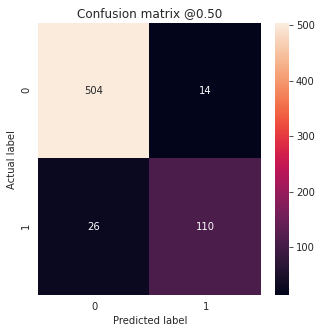

In [ ]:
cnn_test_pred_smtom = model.predict(X_test_enc.to_numpy().reshape(len(X_test_enc),X_test_enc.shape[-1],1), batch_size=BATCH_SIZE)
plot_cm(y_test_enc, cnn_test_pred_smtom)
a = cnn_test_pred_smtom > 0.5
print(classification_report(y_test_enc, a))

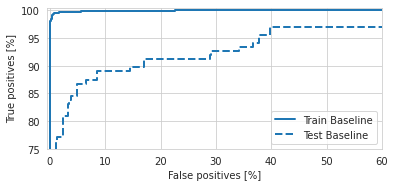

In [ ]:
cnn_train_pred_smtom = model.predict(X_smtom_enc.reshape(len(X_smtom_enc),X_smtom_enc.shape[-1],1), batch_size=BATCH_SIZE)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

plot_roc("Train Baseline", y_smtom_enc, cnn_train_pred_smtom, color=colors[0])
plot_roc("Test Baseline", y_test_enc, cnn_test_pred_smtom, color=colors[0], linestyle='--')
plt.legend(loc='lower right')

##**Oversampling plus TOMEK**

###**Base**

In [ ]:
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
model = make_model(X_rostom_enc.shape[-1])
history = model.fit(
    X_rostom_enc,
    y_rostom_enc,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(X_val_enc, y_val_enc))

Epoch 1/1000
2/2 [==============================] - 3s 967ms/step - loss: 1.1070 - tp: 1027.0000 - fp: 1540.6667 - tn: 508.6667 - fn: 23.6667 - accuracy: 0.4964 - precision: 0.4002 - recall: 0.9774 - auc: 0.6262 - val_loss: 1.2644 - val_tp: 121.0000 - val_fp: 403.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.2309 - val_precision: 0.2309 - val_recall: 1.0000 - val_auc: 0.4700
Epoch 2/1000
2/2 [==============================] - 0s 44ms/step - loss: 1.1064 - tp: 908.3333 - fp: 1527.3333 - tn: 3.3333 - fn: 7.0000 - accuracy: 0.3726 - precision: 0.3728 - recall: 0.9924 - auc: 0.4440 - val_loss: 1.2485 - val_tp: 121.0000 - val_fp: 403.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.2309 - val_precision: 0.2309 - val_recall: 1.0000 - val_auc: 0.4738
Epoch 3/1000
2/2 [==============================] - 0s 44ms/step - loss: 1.0770 - tp: 910.6667 - fp: 1523.6667 - tn: 2.6667 - fn: 9.0000 - accuracy: 0.3736 - precision: 0.3743 - recall: 0.9903 - auc: 0.4615 - va

In [ ]:
#test results
results = model.evaluate(X_test_enc, y_test_enc, batch_size=BATCH_SIZE, verbose=0)

print("test results :")
for name, value in zip(model.metrics_names, results):
  print(name, ': ', value)
print()

test results :
loss :  0.40232354402542114
tp :  84.0
fp :  81.0
tn :  437.0
fn :  52.0
accuracy :  0.7966361045837402
precision :  0.5090909004211426
recall :  0.6176470518112183
auc :  0.8379300832748413



              precision    recall  f1-score   support

           0       0.89      0.84      0.87       518
           1       0.51      0.62      0.56       136

    accuracy                           0.80       654
   macro avg       0.70      0.73      0.71       654
weighted avg       0.81      0.80      0.80       654



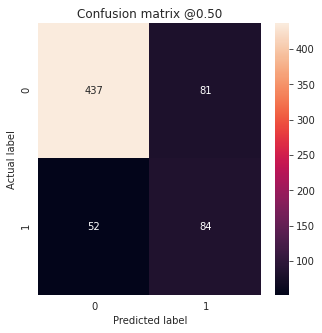

In [ ]:
base_test_pred_rostom = model.predict(X_test_enc, batch_size=BATCH_SIZE)
plot_cm(y_test_enc, base_test_pred_rostom)
a = base_test_pred_rostom > 0.5
print(classification_report(y_test_enc, a))

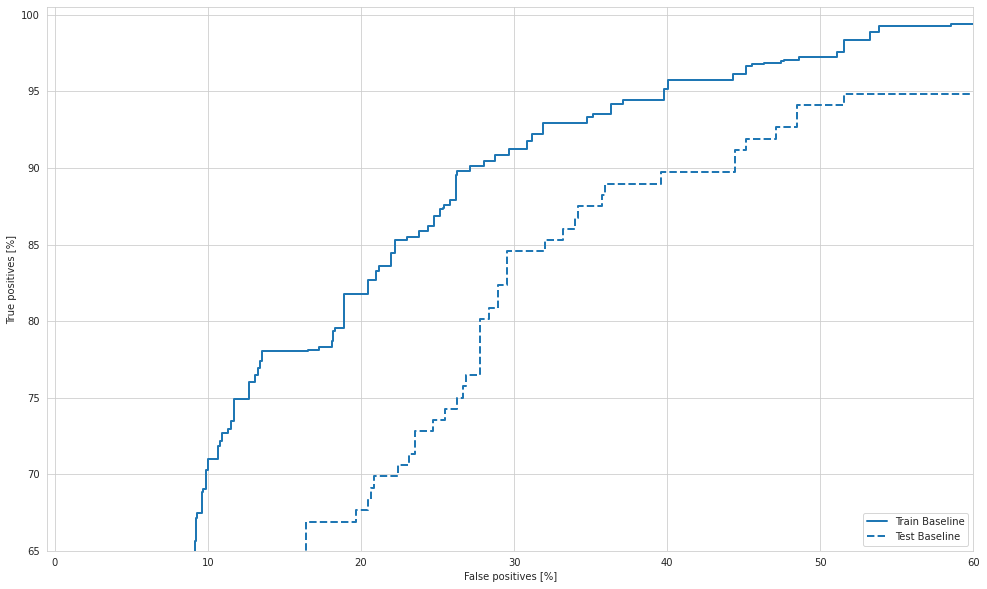

In [ ]:
base_train_pred_rostom = model.predict(X_rostom_enc, batch_size=BATCH_SIZE)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

plot_roc("Train Baseline", y_rostom_enc, base_train_pred_rostom, color=colors[0])
plot_roc("Test Baseline", y_test_enc, base_test_pred_rostom, color=colors[0], linestyle='--')
plt.legend(loc='lower right')

###**CNN**

In [ ]:
random.seed(seed_value)

np.random.seed(seed_value)

tf.random.set_seed(seed_value)
model = make_cnn_model(X_rostom_enc.shape[-1])
history = model.fit(
    X_rostom_enc.reshape(len(X_rostom_enc),X_rostom_enc.shape[-1],1),
    y_rostom_enc,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(X_val_enc.to_numpy().reshape(len(X_val_enc),X_val_enc.shape[-1],1), y_val_enc))

Epoch 1/1000
2/2 [==============================] - 3s 929ms/step - loss: 0.8178 - tp: 957.3333 - fp: 1607.3333 - tn: 442.0000 - fn: 93.3333 - accuracy: 0.4521 - precision: 0.3732 - recall: 0.9108 - auc: 0.5537 - val_loss: 0.8145 - val_tp: 116.0000 - val_fp: 402.0000 - val_tn: 1.0000 - val_fn: 5.0000 - val_accuracy: 0.2233 - val_precision: 0.2239 - val_recall: 0.9587 - val_auc: 0.4166
Epoch 2/1000
2/2 [==============================] - 0s 83ms/step - loss: 0.7469 - tp: 736.3333 - fp: 1371.0000 - tn: 159.6667 - fn: 179.0000 - accuracy: 0.3657 - precision: 0.3495 - recall: 0.8085 - auc: 0.4351 - val_loss: 0.7075 - val_tp: 62.0000 - val_fp: 232.0000 - val_tn: 171.0000 - val_fn: 59.0000 - val_accuracy: 0.4447 - val_precision: 0.2109 - val_recall: 0.5124 - val_auc: 0.4350
Epoch 3/1000
2/2 [==============================] - 0s 80ms/step - loss: 0.6984 - tp: 146.6667 - fp: 299.3333 - tn: 1227.0000 - fn: 773.0000 - accuracy: 0.5605 - precision: 0.3288 - recall: 0.1612 - auc: 0.4414 - val_loss:

In [ ]:
#test results
results = model.evaluate(X_test_enc.to_numpy().reshape(len(X_test_enc),X_test_enc.shape[-1],1), y_test_enc, batch_size=BATCH_SIZE, verbose=0)

print("test results :")
for name, value in zip(model.metrics_names, results):
  print(name, ': ', value)
print()

test results :
loss :  0.20913860201835632
tp :  110.0
fp :  11.0
tn :  507.0
fn :  26.0
accuracy :  0.9434250593185425
precision :  0.9090909361839294
recall :  0.8088235259056091
auc :  0.9454845786094666



              precision    recall  f1-score   support

           0       0.95      0.98      0.96       518
           1       0.91      0.81      0.86       136

    accuracy                           0.94       654
   macro avg       0.93      0.89      0.91       654
weighted avg       0.94      0.94      0.94       654



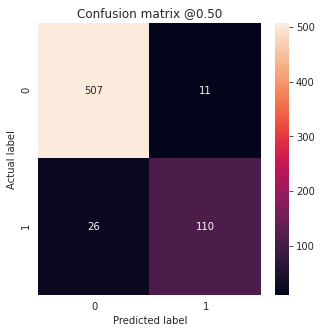

In [ ]:
cnn_test_pred_rostom = model.predict(X_test_enc.to_numpy().reshape(len(X_test_enc),X_test_enc.shape[-1],1), batch_size=BATCH_SIZE)
plot_cm(y_test_enc, cnn_test_pred_rostom)
a = cnn_test_pred_rostom > 0.5
print(classification_report(y_test_enc, a))

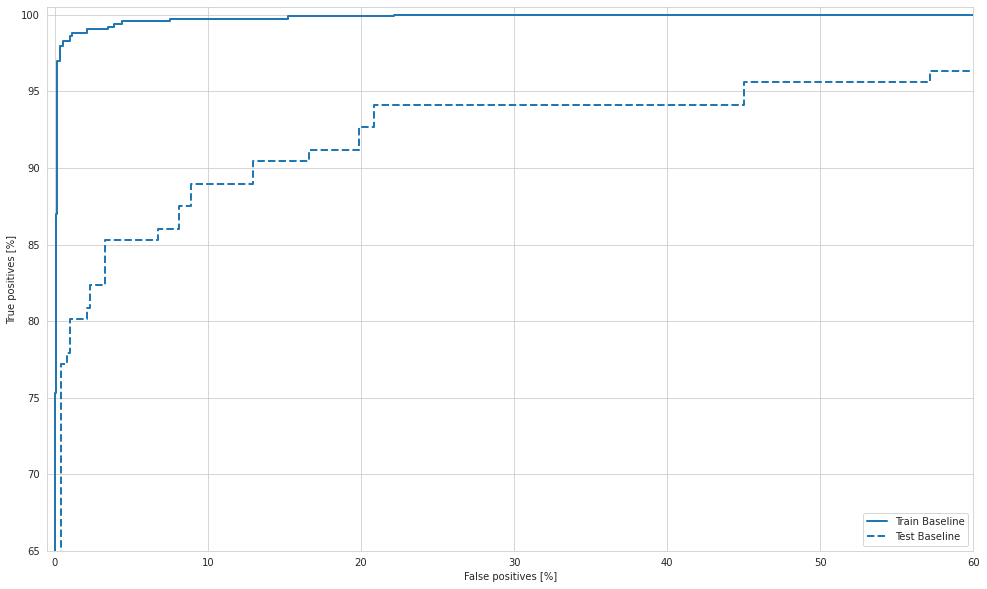

In [ ]:
cnn_train_pred_rostom = model.predict(X_rostom_enc.reshape(len(X_rostom_enc),X_rostom_enc.shape[-1],1), batch_size=BATCH_SIZE)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

plot_roc("Train Baseline", y_rostom_enc, cnn_train_pred_rostom, color=colors[0])
plot_roc("Test Baseline", y_test_enc, cnn_test_pred_rostom, color=colors[0], linestyle='--')
plt.legend(loc='lower right')

##**Plot ROC Results**

### **Base ROC** 

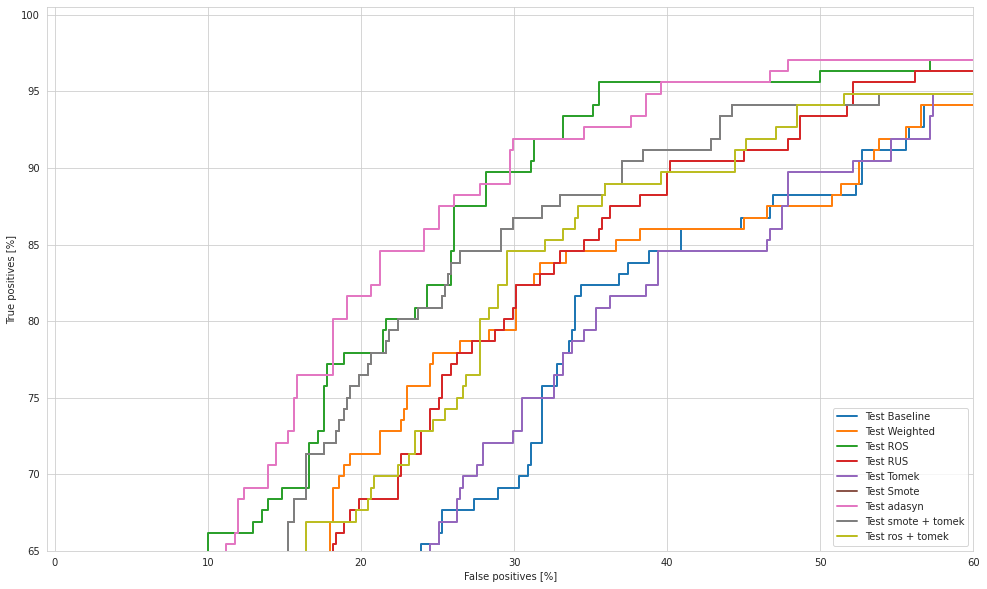

In [ ]:
plt.rcParams["figure.figsize"] = (25, 10)
plot_roc("Test Baseline", y_test_enc, base_test_pred, color=colors[0])

plot_roc("Test Weighted", y_test_enc, base_test_pred_wei, color=colors[1])

plot_roc("Test ROS", y_test_enc, base_test_pred_ros, color=colors[2])

plot_roc("Test RUS", y_test_enc, base_test_pred_rus, color=colors[3])
plot_roc("Test Tomek", y_test_enc, base_test_pred_tom, color=colors[4])
plot_roc("Test Smote", y_test_enc, base_test_pred_smt, color=colors[5])
plot_roc("Test adasyn", y_test_enc, base_test_pred_ads, color=colors[6])
plot_roc("Test smote + tomek", y_test_enc, base_test_pred_smtom, color=colors[7])
plot_roc("Test ros + tomek", y_test_enc, base_test_pred_rostom, color=colors[8])


plt.legend(loc='lower right')

### **CNN ROC** 

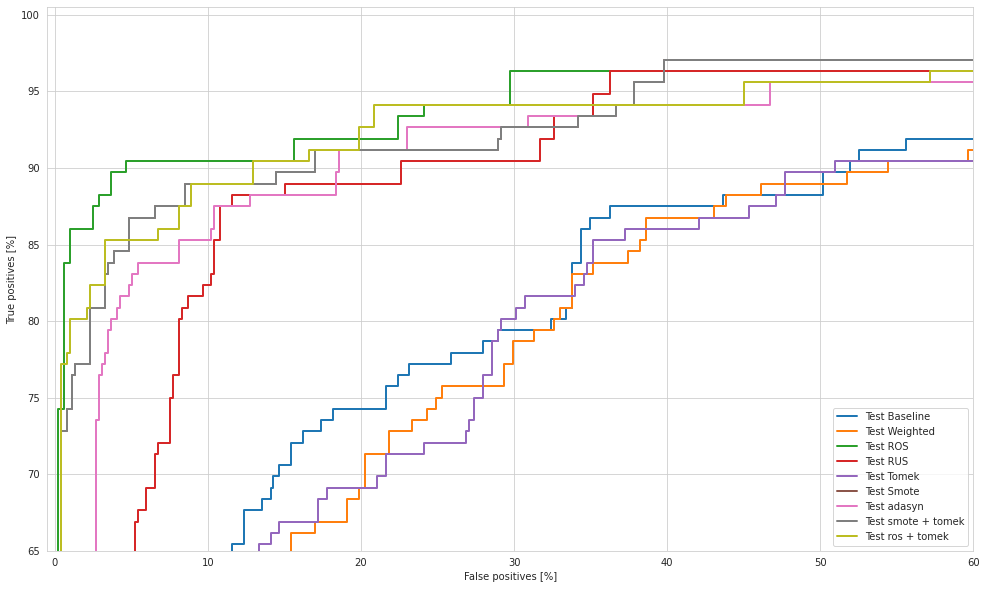

In [ ]:
plt.rcParams["figure.figsize"] = (25, 10)
plot_roc("Test Baseline", y_test_enc, cnn_test_pred, color=colors[0])

plot_roc("Test Weighted", y_test_enc,cnn_test_pred_wei, color=colors[1])

plot_roc("Test ROS", y_test_enc, cnn_test_pred_ros, color=colors[2])

plot_roc("Test RUS", y_test_enc, cnn_test_pred_rus, color=colors[3])
plot_roc("Test Tomek", y_test_enc, cnn_test_pred_tom, color=colors[4])
plot_roc("Test Smote", y_test_enc, cnn_test_pred_smt, color=colors[5])
plot_roc("Test adasyn", y_test_enc, cnn_test_pred_ads, color=colors[6])
plot_roc("Test smote + tomek", y_test_enc, cnn_test_pred_smtom, color=colors[7])
plot_roc("Test ros + tomek", y_test_enc, cnn_test_pred_rostom, color=colors[8])


plt.legend(loc='lower right')